# Narrative Flow of Men and Women



 ### Hypothesis:

Solidarity and social relations were different in the men and women sections of Birkenau; men and women recall them in different ways and in different context; solidarity and social bonds have different place in the narratives of men and women.

If the hypothesis is true:
- the story line (or narrative flow) leading to the discussion of sociability and solidarity is different in testimonies of men and women; the most likely sequences of topics (to be named narrative pathway) leading to topics describing solidarity and sociability are different
- different amount of traffic is going through  similar pathways leading to solidarity and sociability
- either different nodes (to be named priming topics) are preceding and following (to be named exit topics) topics of solidarity and sociability or if they are similar transitions to them happen at different intensitiy


Key research questions to be studied here:
- What are the major pathways between the memory of arrival to Birkenau and leaving from Birkenau?
- How are nodes related to solidarity (food sharing, aid giving) and social bonds (friends, social bonds, family) are situated along the major pathways? For women and men, are they peripheral or central? I.e. do a significant amount of narrative flow go towards them for men and women?
- What are the exit and priming topics for solidarity (food sharing, aid giving) and social bonds for men and women? What are those topics that prime them?
- How are topics of solidarity and social bonds related to survival explanations?
- How is friendship related to aid giving for men and for women? What are the transitory topics between them?
- Where did solidarity take place? In what contexts did solidarity take place?



## Load the necessary libraries and set up paths

In [2]:
import constants
import pandas as pd
import os
from IPython.display import display
import json
import pyemma
from tables import *
import sys; sys.path.insert(0, '..')
from markov_modelling.markov_utils import *
from collections import Counter
from varname.helpers import Wrapper

In [3]:
input_directory = constants.output_data_markov_modelling
path = os.getcwd()
parent = os.path.abspath(os.path.join(path, os.pardir))
input_directory = parent +'/'+ constants.output_data_markov_modelling

## Load the relevant data

Load the complete women and men data 

In [4]:
data_set_1_w  = pyemma.load(input_directory+'complete_w'+'/'+'pyemma_model','simple')
data_set_1_complete  = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')
data_set_1_m = pyemma.load(input_directory+'complete_m'+'/'+'pyemma_model','simple')
data_set_1_complete = pyemma.load(input_directory+'complete'+'/'+'pyemma_model','simple')

Load the stationary probabilities

In [6]:
stationary_probs = pd.read_csv(input_directory+'/'+'complete'+'/'+'stationary_probs.csv')

Load data representing men and women who worked

In [7]:
data_set_1_w_work  = pyemma.load(input_directory+'work_w'+'/'+'pyemma_model','simple')
data_set_1_m_work = pyemma.load(input_directory+'work_m'+'/'+'pyemma_model','simple')

Load data representing men and women who did not  work

In [8]:
data_set_1_w_not_w  = pyemma.load(input_directory+'notwork_w'+'/'+'pyemma_model','simple')
data_set_1_m_not_w = pyemma.load(input_directory+'notwork_m'+'/'+'pyemma_model','simple')

Load the state index

In [9]:
input_directory = parent +'/'+ constants.output_data_segment_keyword_matrix
features_df = pd.read_csv(input_directory+constants.output_segment_keyword_matrix_feature_index)

## Create functions for frequently used operations

### Calculate first mean passage time function

In [7]:
def calculate_mfpt(mm,source,target,topic_labels):
    source_indices = []
    for element in source:
        source_index_full = topic_labels.index(element)
        source_index_active = mm._full2active[source_index_full]
        source_indices.append(source_index_active)
    target_indices = []
    for element in target:
        target_index_full = topic_labels.index(element)
        target_index_active = mm._full2active[target_index_full]
        target_indices.append(target_index_active)
    print (source_indices)
    mfpt = pyemma.msm.tpt(mm,source_indices,target_indices).mfpt
    print (mfpt)

### Print paths functions

In [115]:
def print_paths(flux_w,max_length=None):
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                print (path + ':' + str(flux_w[path]))
                print ('\n')
        else:
            print (path + ':' + str(flux_w[path]))
            print ('\n')

In [38]:
def print_similar_paths(flux_w,flux_m,max_length=None,show=True):
    all_paths = []
    for path in flux_w:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    for path in flux_m:
        if max_length is not None:
            if len(path.split('-'))<=max_length:
                all_paths.append(path)
        else:
            all_paths.append(path)
    counts = Counter(all_paths)

    dup_paths = [path for path in all_paths  if counts[path] > 1]
    dup_paths = set(dup_paths)
    if show:
        for path in dup_paths:
            print (path)
            print ('Women: '+str(flux_w[path]))
            print ('Men: '+str(flux_m[path]))
            print ('\n')
    else:
        result = []
        for path in dup_paths:
            
            result.append([path,flux_w[path],flux_m[path]])
        return result


### Load  the topic map

In [8]:
topic_map_directory = parent +'/'+constants.input_data+'feature_maps/'
topic_map = pd.read_csv(topic_map_directory+'feature_map_no_friends_no_food_sharing.csv')
topic_map_living_conditions = topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list()

topic_map_living_condition = []
for element in topic_map[topic_map['CoverTerm']=="living conditions"].KeywordLabel.to_list():
    if 'camp' in element:
        topic_map_living_condition.append(' '.join(element.split(' ')[1:]))
    else:
        topic_map_living_condition.append(element)

In [9]:
topic_map_forced_labor = topic_map[topic_map['CoverTerm']=="forced labor"].KeywordLabel.to_list()

## Observation 1

### Qualitative description

Both men and women discuss aid giving in the following camp living conditions and forced labour, women are more likely to discuss it following camp living conditions. While men are more likely to discuss it following forced labour. 

For instance, the following pathway is present in both men and women testimonies but in testimonies of women (3.3%), more traffic is going through it than in testimonies of men(2%):

arrival-selections-intake procedures-living conditions-aid giving

Furthermore, the amount of traffic going through the following path is different for men (2.8) and women (4.4%) :

living conditions-aid giving

Similarly, more traffic is going through the following path for women (3 %) and men (0.8%):

living conditions-food-aid giving

Finally, when the direct path between forced labor and aid giving is examined then in case of men (11.357897171905313) more traffic is going than in case of women (9%):

forced labor-aid giving

### Quantitative evidence 1

In [20]:
story_start = 'arrival'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()
flux = 1

In [21]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [22]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living conditions prime aid giving for women

In [23]:
result = []

for path in flux_w:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-selections-intake procedures-living conditions-aid giving
3.3261557044393664


arrival-loved ones' separations-intake procedures-housing conditions-aid giving
1.2580761275344385


arrival-intake procedures-housing conditions-sanitary conditions-aid giving
1.0985710714183092


arrival-sisters-departure-transfer conditions-intake procedures-environmental conditions-aid giving
0.2414605667609902


arrival-housing conditions-food-selections-intake procedures-Appell-sanitary conditions-infestations-aid giving
0.2007682669680113


arrival-German soldiers-intake procedures-showers-aid giving
0.11875671237813673


arrival-brothers-intake procedures-housing conditions-food-sanitary conditions-lice-aid giving
0.08476580277105308


arrival-migration experiences-working life-future message-loved ones' introductions-living conditions-selections-transfer to camps-transfer conditions-transfer sanitary conditions-aid giving
0.07689406704760635


arrival-Czechoslovak prisoners-selections-intake

Print the total amount of traffic going through these nodes

In [24]:
print (np.array(result).sum())

6.480161664038617


Print those paths where living conditions prime aid giving for men

In [25]:
result = []

for path in flux_m:
    # Get the state before end state
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_living_condition:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-living conditions-aid giving
2.0488989687848225


arrival-intake procedures-housing conditions-aid giving
1.6903370505760626


arrival-intake procedures-showers-aid giving
0.5527160765795579


arrival-crematoria-selections-intake procedures-food-latrines-aid giving
0.4508621445562738


arrival-living conditions-infestations-aid giving
0.371666476982283


arrival-food-hunger-selections-intake procedures-uniforms-housing conditions-sanitary conditions-aid giving
0.20325474364557297


arrival-food acquisition-departure-transfer conditions-intake procedures-prisoner tattoos (stills)-environmental conditions-aid giving
0.164327499366274


arrival-deportation family interactions-selections-intake procedures-personal property seizure-deportation food-deportation sanitary conditions-aid giving
0.021831766890181566


arrival-dwarf prisoners-family interactions-selections-intake procedures-housing conditions-sanitary conditions-aid giving
0.01964111053769269


Print the total amount of traffic going through these nodes

In [26]:
print (np.array(result).sum())

5.542651988549617


Print those paths where forced labor prime aid giving for women

In [27]:
result = []

for path in flux_w:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-aid giving
5.366424007453563


arrival-loved ones' separations-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
1.4556141516854084


arrival-loved ones' separations-intake procedures-living conditions-selections-transfer to camps-German concentration camps (generic)-forced labor-forced labor conditions-aid giving
0.34845903658844235


arrival-Jewish prisoner functionaries-selections-transfer to camps-transfer conditions-forced labor companies-aid giving
0.15095369770971961


arrival-Siemens (firm)-aid giving
0.011172864606263636


arrival-languages-Greek prisoners-corpses-selections-loved ones' final contacts-orchestras-Siemens (firm)-aid giving
0.005987338618148708




Print the total amount of traffic going through these nodes

In [28]:
print (np.array(result).sum())

7.338611096661546


Print those paths where forced labor prime aid giving for men

In [29]:
result = []

for path in flux_m:
    penultimate_state = path.split('-')[-2]
    if penultimate_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-aid giving
4.673073571268745


arrival-selections-intake procedures-forced labor-aid giving
3.9390573005910623


arrival-loved ones' separations-intake procedures-living conditions-forced labor-forced labor conditions-aid giving
0.9189153741606001


arrival-body searches-prisoner tattoos-forced labor-I. G. Farben-aid giving
0.06211097888215399


arrival-Belgian prisoners-Holocaust faith issues-departure-freight trains-transfer conditions-loved ones' fates-forced labor companies-aid giving
0.020680896807975545


arrival-camp procedures-transfer to camps-transfer conditions-loved ones' fates-forced labor companies-aid giving
0.00421413682829218




Print the total amount of traffic going through these nodes

In [30]:
print (np.array(result).sum())

9.61805225853883


### Visualization

9 labels to show
9 labels to show


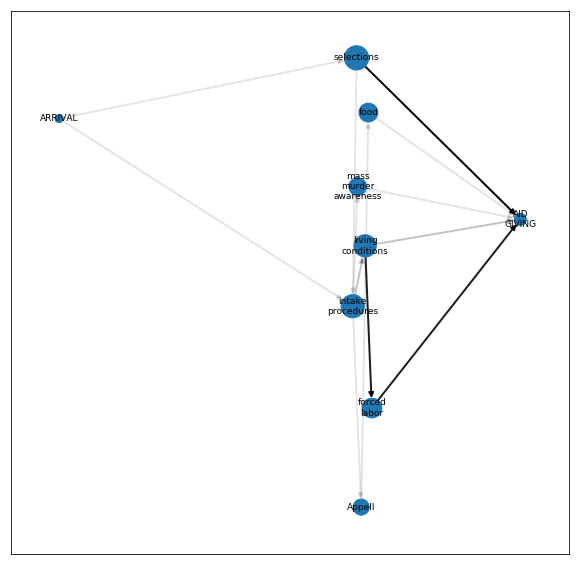

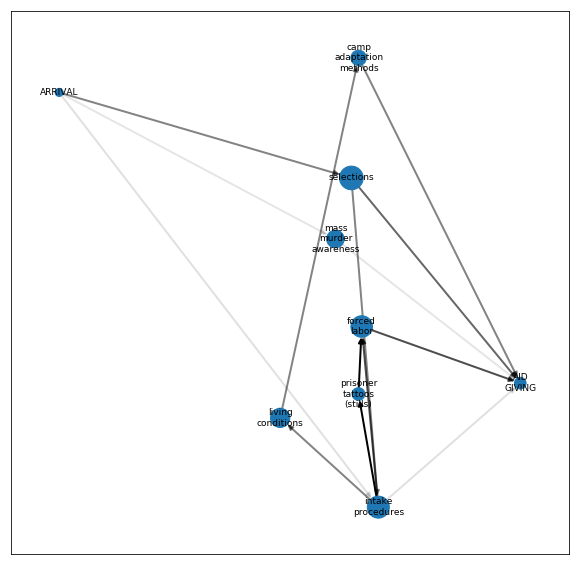

In [370]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [171]:
story_start = 'living conditions'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [180]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [181]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

Print the most important pathways for women

In [174]:
print_paths(flux_w,max_length=3)

living conditions-forced labor-aid giving:6.644852704834618


living conditions-selections-aid giving:5.494808205247127


living conditions-aid giving:4.417279021596912


living conditions-food-aid giving:3.0176115426843433


living conditions-camp adaptation methods-aid giving:2.9336925881011084


living conditions-mass murder awareness-aid giving:2.920880229051546


living conditions-Appell-aid giving:2.0333141829806163


living conditions-family interactions-aid giving:1.7830534367901554




Print the most important pathways for men

In [175]:
print_paths(flux_m,max_length=3)

living conditions-forced labor-aid giving:6.564598702399662


living conditions-camp adaptation methods-aid giving:4.4181837256414696


living conditions-selections-aid giving:3.471622581939516


living conditions-aid giving:2.8647828113142224


living conditions-mass murder awareness-aid giving:2.4899964842110562


living conditions-housing conditions-aid giving:1.6076542634355284


living conditions-social relations-aid giving:1.572449463695696


living conditions-brutal treatment-aid giving:1.5272301041002188


living conditions-Appell-aid giving:1.4497261529085559




Print similar pathways

In [186]:
print_similar_paths(flux_w,flux_m)

living conditions-extended family members-aid giving
Women: 1.225256479914631
Men: 0.8011126426628061


living conditions-selections-intake procedures-aid giving
Women: 1.9239348755373278
Men: 2.382461559287751


living conditions-prisoner external contact-aid giving
Women: 0.6907330265617383
Men: 0.7358489769871611


living conditions-Blockälteste-aid giving
Women: 1.4297207357737838
Men: 0.47926944203580374


living conditions-aid giving
Women: 4.417279021596912
Men: 2.8647828113142224


living conditions-social relations-aid giving
Women: 1.646803261212461
Men: 1.572449463695696


living conditions-camp adaptation methods-aid giving
Women: 2.9336925881011084
Men: 4.4181837256414696


living conditions-survival explanations-aid giving
Women: 0.4444274121911082
Men: 0.609458399124247


living conditions-Appell-aid giving
Women: 2.0333141829806163
Men: 1.4497261529085559


living conditions-diseases-aid giving
Women: 1.181620060637828
Men: 1.0008377855366162


living conditions-selecti

### Visualize

7 labels to show
10 labels to show


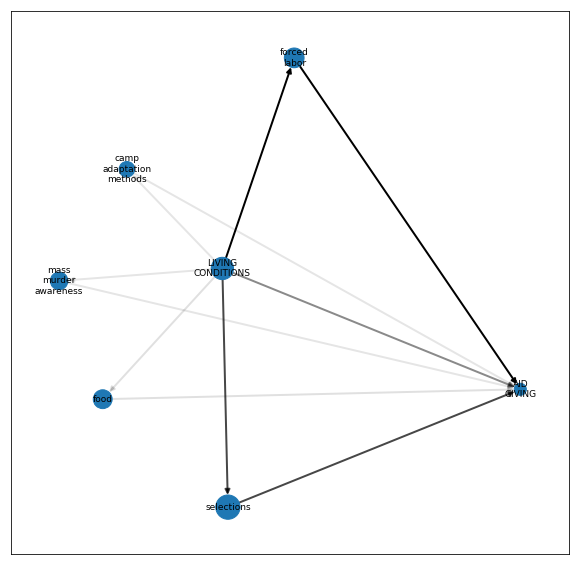

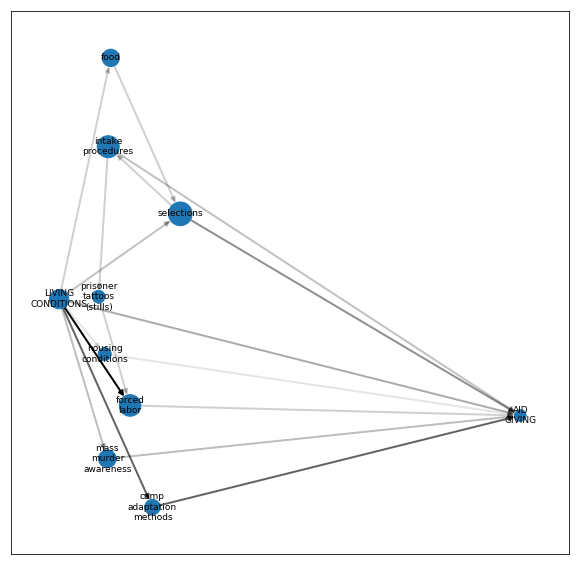

In [378]:
flux=0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [187]:
story_start = 'forced labor'
story_end = 'aid giving'
state_index = features_df.KeywordLabel.to_list()

In [188]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

In [189]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.8)

Print most important path for women

In [190]:
print_paths(flux_w,max_length=2)

forced labor-aid giving:9.61463771635918




Print most important path for men

In [191]:
print_paths(flux_m,max_length=2)

forced labor-aid giving:11.357897171905313




## Observation 2

### Qualitative description

As above, a key topic that follows the discussion of aid giving is forced labour. However, this has different weight in the narratives of men and women. Men are more likely to discuss forced labour following aid giving. By contrast, women are more likely to discuss housing and living conditions.

The traffic going through the following two paths are different for men and women.

aid giving-forced labor <br/>
Women: 5.892215934536441 <br/>
Men: 9.179672557709363<br/>

aid giving-living conditions <br/>
Women: 4.989195032183169 <br/>
Men: 3.940806972832768 <br/>




### Quantitative evidence 1

In [207]:
story_start = 'aid giving'
story_end = 'departure'
flux = 1

In [208]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [209]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow aid giving for women

In [210]:
result = []

for path in flux_w:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

aid giving-forced labor-departure
2.7296158781494175


aid giving-forced labor-food-selections-intake procedures-clothing-departure
0.8289941816137725


aid giving-forced labor-Mengele, Josef-intake procedures-housing conditions-social relations-departure
0.5123192060883646


aid giving-forced labor-food-sanitary conditions-physical hygiene maintenance-Allied military operations-departure
0.07939032173836172




Print the total amount of traffic going through these nodes

In [211]:
print (np.array(result).sum())

4.150319587589916


Print those paths where forced labor follow aid giving for men

In [212]:
result = []

for path in flux_m:
    if len(path.split('aid giving-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

aid giving-forced labor-departure
2.4194474651698146


aid giving-forced labor-politico-military event awareness-departure
1.3753853668599325


aid giving-forced labor-food acquisition-departure
1.3548259776625797


aid giving-forced labor-brutal treatment-departure
0.8978199621392627


aid giving-forced labor-food-departure
0.7325144039431423


aid giving-forced labor-Polish prisoners-food-arrival-selections-intake procedures-prisoner tattoos-prisoner tattoos (stills)-Greek prisoners-departure
0.17555899775649847




Print the total amount of traffic going through these nodes

In [213]:
print (np.array(result).sum())

6.955552173531229


Print those paths where living conditions follow aid giving for women

In [214]:
result = []

for path in flux_w:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')
print (np.array(result).sum())

aid giving-living conditions-selections-transfer to camps-departure
2.5186672379147423


aid giving-living conditions-departure
0.9061933059574195


aid giving-housing conditions-departure
0.8587674293844215


aid giving-living conditions-forced labor-bombardments-departure
0.2997903332730708


aid giving-housing conditions-Appell-forced labor-food acquisition-hiding and evasion-departure
0.1911433227958466


aid giving-living conditions-loved ones' renewed contacts-loved ones' fates-prisoner tattoos-showers-clothing-shoes-Mengele, Josef-arrival-selections-transfer to camps-forced march conditions-forced march guards-departure
0.006853354589021588


aid giving-living conditions-Appell-SS/SD personnel-intake procedures-gas chambers-doctors-departure
0.0023650301763213028


4.783780014090843


Print the total amount of traffic going through these nodes

In [215]:
print (np.array(result).sum())

4.783780014090843


Print those paths where living conditions follow aid giving for men

In [216]:
result = []

for path in flux_m:
    if len(path.split('aid giving-living conditions-'))>1 or len(path.split('aid giving-housing conditions-'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

aid giving-living conditions-camp adaptation methods-departure
1.6736271018173603


aid giving-living conditions-Appell-selections-intake procedures-prisoner tattoos (stills)-departure
1.0886399886292717


aid giving-housing conditions-living conditions-transfer to camps-transfer conditions-perpetrator liberator-approach responses-departure
0.7409143120709991


aid giving-housing conditions-food-Soviet prisoners-departure
0.2652825562797489


aid giving-living conditions-food-latrines-departure
0.06391810038896809


aid giving-living conditions-food-gas chambers-psychological reactions-Roma prisoners-prisoner tattoos-criminal prisoners-survival explanations-attitudes-Holocaust testimony sharing reluctance-Holocaust testimony sharing willingness-post-World War II reflections-transfer to camps-transfer deaths-transfer killings-Ukrainian prisoners-departure
0.004501601303121525


aid giving-housing conditions-camp procedures-forced labor-prisoner identification numbers-prisoner tattoos (s

Print the total amount of traffic going through these nodes

In [217]:
print (np.array(result).sum())

3.8430286498732085


### Visualization

9 labels to show
12 labels to show


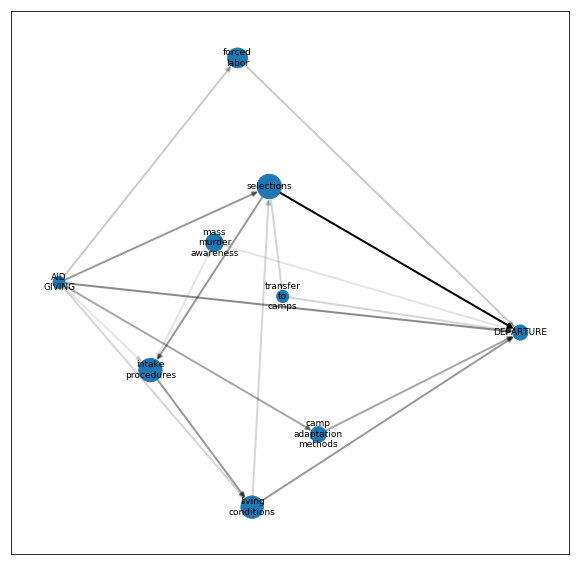

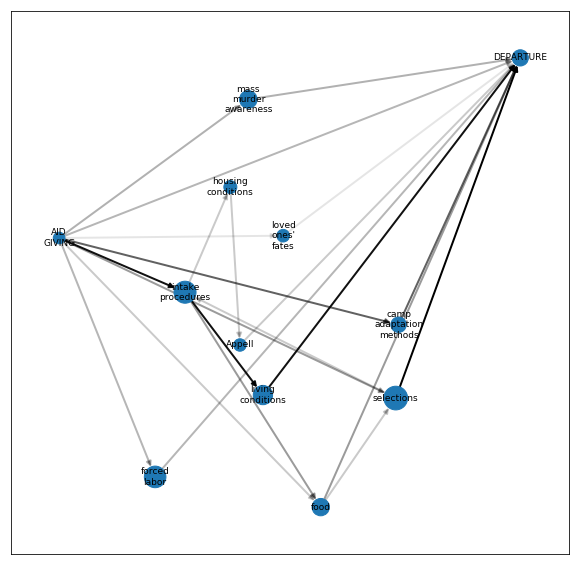

In [337]:
flux = 0.25
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [223]:
story_start = 'aid giving'
story_end = 'living conditions'

In [222]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)b

Print the amount of traffic going between them for women and men

In [225]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-living conditions
Women: 4.989195032183169
Men: 3.940806972832768




In [248]:
story_start = 'aid giving'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [249]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [250]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

Print the amount of traffic going between them for women and men

In [251]:
print_similar_paths(flux_w,flux_m,max_length=3)

aid giving-mass murder awareness-forced labor
Women: 2.5096046379381978
Men: 2.4416033200480216


aid giving-forced labor
Women: 5.892215934536441
Men: 9.179672557709363


aid giving-loved ones' fates-forced labor
Women: 1.4882000001663958
Men: 2.0051237205602863


aid giving-brutal treatment-forced labor
Women: 0.9538649805385727
Men: 1.3315739039334016


aid giving-social relations-forced labor
Women: 1.3593315131018402
Men: 1.1786068466169186


aid giving-camp adaptation methods-forced labor
Women: 2.944930089053586
Men: 1.9179842085775847




## Observation 3

### Qualitative description

Similarly to aid giving, women are more likely to discuss food sharing following living conditions, whereas men discuss it following forced labour. 

The total amount of traffic going through the following two paths for women is 11,8 % and for men it is 8.8%:

living conditions-food-food sharing

living conditions-food sharing

At the same time, the total traffic going through the following paths is different for men (18.3%) and women 15.2):

forced labor-food sharing

forced labor-food-food sharing


### Quantitative evidence 1

In [252]:
story_start = 'arrival'
story_end = 'food sharing'
flux = 1

In [253]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [254]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where living and housing conditions prime food sharing for women

In [262]:
result = []

for path in flux_w:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-food sharing
4.756063911165277


arrival-loved ones' separations-intake procedures-housing conditions-food sharing
1.7558327389821418




Print the total amount of traffic going through these nodes

In [263]:
print (np.array(result).sum())

6.511896650147419


Print those paths where living and housing conditions prime food sharing for men

In [264]:
result = []

for path in flux_m:
    if len(path.split('-living conditions-food sharing'))>1 or len(path.split('-housing conditions-food sharing'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-intake procedures-housing conditions-food sharing
2.580383533099845


arrival-Mengele, Josef-intake procedures-living conditions-food sharing
2.00967295207804




Print the total amount of traffic going through these nodes

In [265]:
print (np.array(result).sum())

4.590056485177885


Print those paths where forced labor prime food sharing for women

In [266]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-food sharing
8.917023181420248




Print the total amount of traffic going through these nodes

In [267]:
print (np.array(result).sum())

8.917023181420248


Print those paths where forced labor prime food sharing for men

In [268]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-food sharing'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-food sharing
9.63912877743524


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-food sharing
3.209596127534682




Print the total amount of traffic going through these nodes

In [270]:
print (np.array(result).sum())

12.84872490496992


### Visualization

10 labels to show
12 labels to show


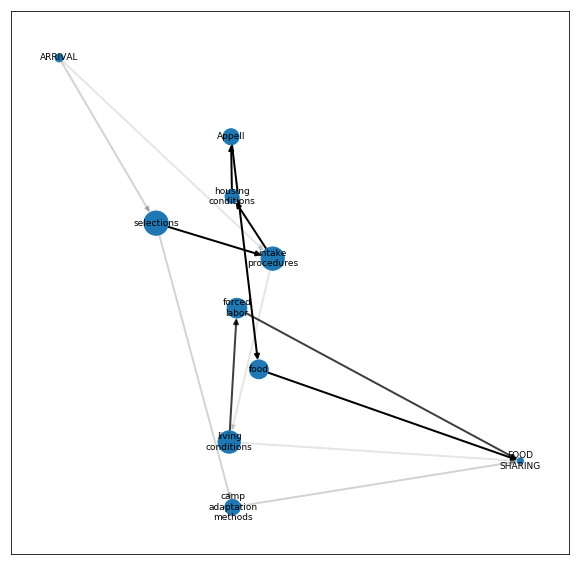

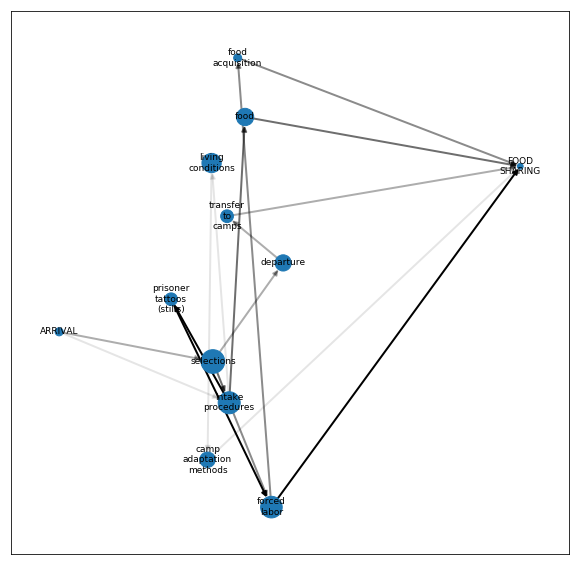

In [345]:
flux = 0.28
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [290]:
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [291]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [292]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-living conditions-food sharing
Women: 4.317199211651201
Men: 1.6368799157200002


forced labor-food-food sharing
Women: 5.552864805475936
Men: 4.795520605873537


forced labor-food acquisition-food sharing
Women: 1.5327620312352606
Men: 3.2672603853928046


forced labor-camp adaptation methods-food sharing
Women: 4.080364617672331
Men: 2.4193054360721082


forced labor-family interactions-food sharing
Women: 1.6275910621913874
Men: 1.3904119987254429


forced labor-social relations-food sharing
Women: 1.1457482475146596
Men: 1.7396814008455899


forced labor-punishments-food sharing
Women: 0.7885042282911512
Men: 1.0904369991461795


forced labor-food sharing
Women: 9.756762640497598
Men: 13.675652985006936


forced labor-aid giving-food sharing
Women: 2.7102776128074293
Men: 2.6220261238461853




In [287]:
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [288]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [289]:
print_similar_paths(flux_w,flux_m,max_length=3)

living conditions-food-food sharing
Women: 6.721787138212146
Men: 6.703548523028335


living conditions-social relations-food sharing
Women: 1.2346546573626762
Men: 1.5490098077168466


living conditions-family interactions-food sharing
Women: 1.775657348474395
Men: 1.5324319633189334


living conditions-forced labor-food sharing
Women: 6.649372316004658
Men: 6.800696402091354


living conditions-departure-food sharing
Women: 1.2830918633566704
Men: 2.880766552541881


living conditions-food sharing
Women: 5.116161552774542
Men: 2.1858927355790505


living conditions-mass murder awareness-food sharing
Women: 1.174814492939797
Men: 1.1749727126144853




## Observation 4

### Qualitative description

In testimonies of men and women, both living conditions and forced labour are discussed following food sharing. There is no difference in terms of the amount of the traffic that goes from food sharing to forced labour.

food sharing-forced labor <br/>
Women: 5.60066015579362  <br/>
Men: 5.661811177443069  <br/>

However, in case of men more traffic is going from food sharing towards living conditions:

food sharing-living conditions <br/>
Women: 4.612779648936039  <br/>
Men: 5.4796159931673705  <br/>

### Quantitative evidence 1

In [295]:
story_start = 'food sharing'
story_end = 'departure'
flux = 1

In [296]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [297]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor follow food sharing for women

In [302]:
result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='forced labor':
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

food sharing-forced labor-departure
2.76665963846987


food sharing-forced labor-food-departure
1.7959111395688039


food sharing-forced labor-Holocaust-related psychological reactions-departure
0.4393078904904754


food sharing-forced labor-German soldiers-intake procedures-living conditions-camp adaptation methods-famous French politicians and diplomats-departure
0.07918084351876627


food sharing-forced labor-German camp guards-living conditions-Slovak prisoners-departure
0.008502186740440704




Print the total amount of traffic going through these nodes

In [301]:
print (np.array(result).sum())

5.089561698788357


Print those paths where forced labor follow food sharing for men

In [303]:
result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state in topic_map_forced_labor:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

food sharing-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.4271904832672804


food sharing-forced labor-departure
2.418825038415106


food sharing-forced labor-food acquisition-Sonderkommando prisoners-departure
0.3474959705061971


food sharing-forced labor-punishments-brutal treatment-living conditions-camp procedures-Jewish prayers-selections-camp adaptation methods-identity concealment-Gestapo personnel-departure
0.0626524935599511


food sharing-forced labor-covert economic activities-departure
0.024812356848907955




Print the total amount of traffic going through these nodes

In [304]:
print (np.array(result).sum())

5.280976342597443


Print those paths where living conditions follow food sharing for women

In [313]:
result = []

for path in flux_w:
    next_state = path.split('-')[1]
    if next_state =='living conditions':
        result.append(flux_w[path])
        print (path)

food sharing-living conditions-departure


Print the total amount of traffic going through these nodes

In [314]:
print (np.array(result).sum())

4.261560027826917


Print those paths where living conditions follow food sharing for men

In [316]:
result = []

for path in flux_m:
    next_state = path.split('-')[1]
    if next_state =="living conditions":
        result.append(flux_m[path])
        print (path)

food sharing-living conditions-departure
food sharing-living conditions-freight trains-transfer-related aid giving-departure
food sharing-living conditions-camp procedures-hospitals-departure
food sharing-living conditions-food-food acquisition-beatings-restitution-post-World War II reflections-Jewish prayers-future message-concentration camps (stills)-departure
5.036024615514617


Print the total amount of traffic going through these nodes

In [319]:
print (np.array(result).sum())

5.036024615514617


### Visualization

9 labels to show
9 labels to show


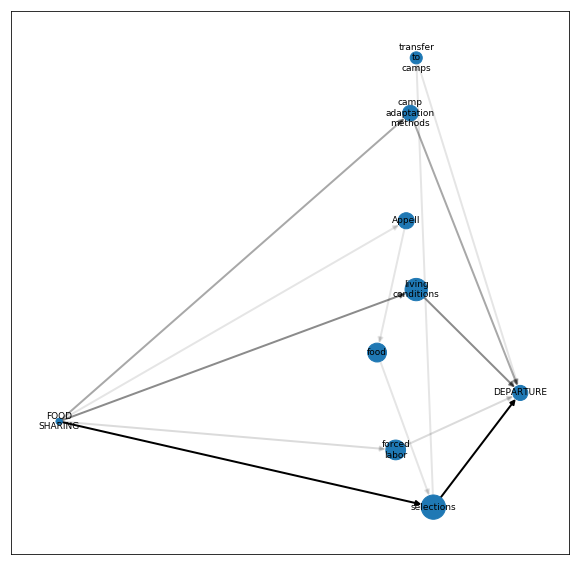

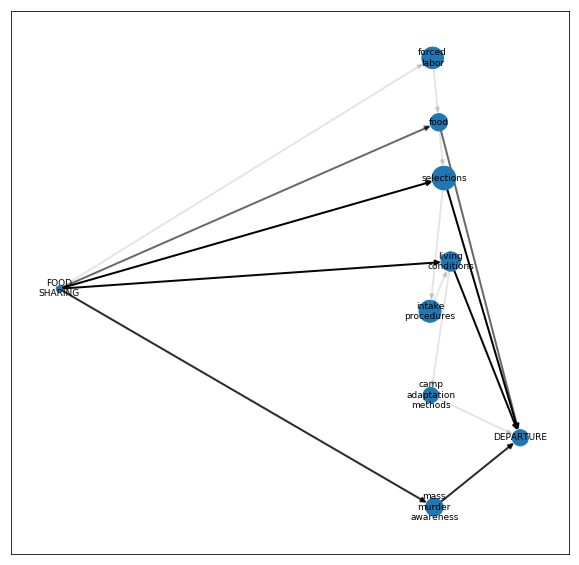

In [353]:
flux = 0.19
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [321]:
story_start = 'food sharing'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [322]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [324]:
print_similar_paths(flux_w,flux_m,max_length=2)

food sharing-forced labor
Women: 5.60066015579362
Men: 5.661811177443069




In [326]:
story_start = 'food sharing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [327]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.5)

In [330]:
print_similar_paths(flux_w,flux_m,max_length=3)

food sharing-mass murder awareness-living conditions
Women: 2.244443540878302
Men: 4.173766718918268


food sharing-living conditions
Women: 4.612779648936039
Men: 5.4796159931673705


food sharing-camp adaptation methods-living conditions
Women: 2.275840049499635
Men: 1.700621853272975


food sharing-prisoner tattoos-living conditions
Women: 1.552426806248359
Men: 0.907514603933499


food sharing-social relations-living conditions
Women: 1.0806550552610865
Men: 1.2466833118305243


food sharing-forced labor-living conditions
Women: 3.795337664166884
Men: 5.274539743957046


food sharing-family interactions-living conditions
Women: 1.4954341851203743
Men: 1.3107774817215814




## Observation 5 A

### Qualitative description

Women tend to discuss social bonds following living environment, whereas men tend to discuss it following forced labour. Different amount of traffic is going through the following paths in case of women (5.3 %) and men (4.3 %):

living conditions-social relations

Different amount of traffic is going through the following paths in case of women (4.6 %) and men (8.6 %):

forced labor-social relations

Finally, food is an key transitionary topic between social relations and living environment for women:

living conditions-food-social relations <br/>
Women: 6.434011448725096<br/>
Men: 3.5924098744045265<br/>

Similarly, food is an key transitionary topic between forced labour and living environment for women:

forced labor-food-social relations<br/>
Women: 5.672980573742698<br/>
Men: 3.5486202551343533<br/>

## Quantitative evidence 1

In [331]:
story_start = 'arrival'
story_end = 'social relations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor prime social relations for women

In [333]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-social relations'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-social relations
3.3911642371375783




Print the total amount of traffic going through these nodes

In [334]:
print (np.array(result).sum())

3.3911642371375783


Print those paths where forced labor prime social relations for men

In [335]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-social relations'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])

arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-social relations
5.2452973753909795


arrival-loved ones' separations-intake procedures-prisoner tattoos-forced labor-social relations
1.6455694762081343




Print the total amount of traffic going through these nodes

In [336]:
print (np.array(result).sum())

6.890866851599114


Print those paths where living conditions prime social relations for women

In [341]:
result = []

for path in flux_w:
    if len(path.split('living conditions-social relations'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-intake procedures-living conditions-social relations
5.385387680048888




Print the total amount of traffic going through these nodes

In [342]:
print (np.array(result).sum())

5.385387680048888


Print those paths where living conditions prime social relations for men

In [343]:
result = []

for path in flux_m:
    if len(path.split('living conditions-social relations'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-intake procedures-living conditions-social relations
4.395672199902185




Print the total amount of traffic going through these nodes

In [344]:
print (np.array(result).sum())

4.395672199902185


### Quantitative evidence 2

In [369]:
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [370]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.6)

In [371]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-Appell-social relations
Women: 2.5632613757639735
Men: 2.7153782992563733


living conditions-aid giving-social relations
Women: 1.0971576289754283
Men: 0.8210229584510832


living conditions-diseases-social relations
Women: 0.6663133974244433
Men: 0.9807303343194201


living conditions-extended family members-social relations
Women: 0.7131802356864573
Men: 0.7237048848570371


living conditions-forced labor-social relations
Women: 3.4127514116002713
Men: 6.339281279218224


living conditions-beatings-social relations
Women: 0.5657435809855759
Men: 0.9378864184374375


living conditions-social relations
Women: 6.827380319447996
Men: 5.757605319552959


living conditions-camp adaptation methods-social relations
Women: 2.611499341177587
Men: 4.196415296183547


living conditions-food-social relations
Women: 6.434011448725096
Men: 3.5924098744045265


living conditions-brutal treatment-social relations
Women: 1.3226468203489667
Men: 0.9438044393542749


living conditions

In [355]:
story_start = 'forced labor'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [356]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [357]:
print_similar_paths(flux_w,flux_m,max_length=3)

forced labor-social relations
Women: 4.605075943403472
Men: 8.646552501301699


forced labor-living conditions-social relations
Women: 4.5943374622199125
Men: 4.087350558219835


forced labor-camp adaptation methods-social relations
Women: 2.638627911816062
Men: 2.6016146198860004


forced labor-aid giving-social relations
Women: 1.5790574903532946
Men: 1.4366675462970064


forced labor-family interactions-social relations
Women: 1.5824664354515992
Men: 1.398504691711474


forced labor-mass murder awareness-social relations
Women: 3.2682747614103658
Men: 1.5066932736981824


forced labor-food-social relations
Women: 5.672980573742698
Men: 3.5486202551343533




### Visualization

8 labels to show
7 labels to show


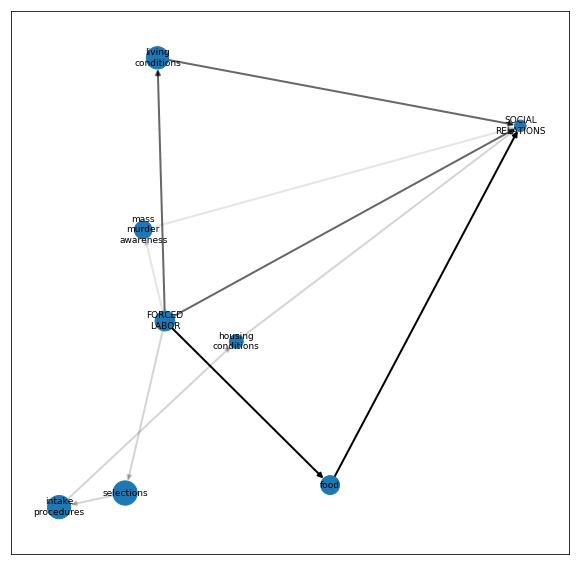

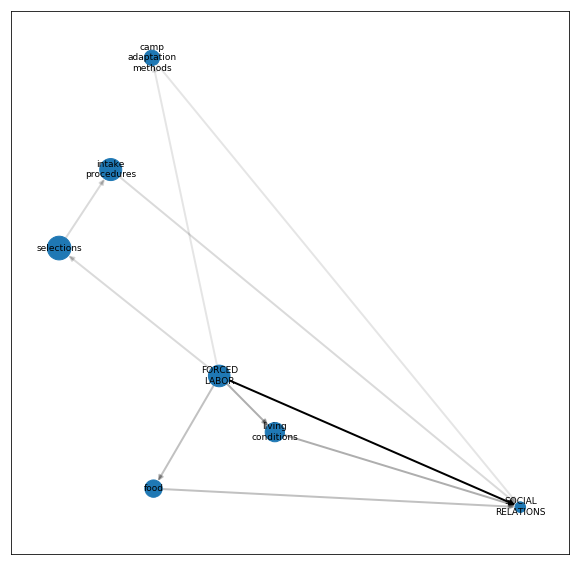

In [749]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 5

### Qualitative description

In narratives of both women and men, the discussion of friendship tends to be preceded by the discussion of living environments and forced labor. For women,  the discussion of friendship followng living environment is stronger:

living conditions-friends <br/>
Women: 7.186269105921992 <br/>
Men: 4.987467244255548 <br/>

An important transitionary topic between living conditions and friends is food:

living conditions-food-friends <br/>
Women: 3.7173273244734077 <br/>
Men: 2.806933358478007 <br/>

But this is stronger for women.

Another important transitionary topic between them is camp adaptation methods, which is stronger for men:

living conditions-camp adaptation methods-friends <br/>
Women: 2.8453985144436293 <br/>
Men: 3.213141994177019 <br/>

For women and men, the traffic between forced labor and friends is equal:

forced labor-friends <br/>
Women: 5.134709271710951 <br/>
Men: 4.946899219077014 <br/>


### Quantitative evidence 1

In [405]:
story_start = 'arrival'
story_end = 'friends'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Print those paths where forced labor prime friends for women

In [422]:
result = []

for path in flux_w:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_w[path])
        print ('\n')
        result.append(flux_w[path])

arrival-intake procedures-living conditions-forced labor-friends
4.590098569288088




Print the total amount of traffic going through these nodes

In [419]:
print (np.array(result).sum())

4.65631175902422


Print those paths where forced labor prime aid giving for men

In [421]:
result = []

for path in flux_m:
    if len(path.split('-forced labor-friends'))>1:
        print (path)
        print (flux_m[path])
        print ('\n')
        result.append(flux_m[path])


arrival-selections-intake procedures-prisoner tattoos (stills)-forced labor-friends
4.6700075871564675




Print the total amount of traffic going through these nodes

In [419]:
print (np.array(result).sum())

4.65631175902422


Print those paths where living conditions prime friends for women

In [420]:
result = []

for path in flux_w:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_w[path])
        print (path)
        print (flux_w[path])
        print ('\n')

arrival-selections-intake procedures-living conditions-friends
6.591571087747801




Print the total amount of traffic going through these nodes

In [419]:
print (np.array(result).sum())

4.65631175902422


Print those paths where forced labor prime aid giving for men

In [418]:
result = []

for path in flux_m:
    if len(path.split('living conditions-friends'))>1:
        result.append(flux_m[path])
        print (path)
        print (flux_m[path])
        print ('\n')

arrival-selections-intake procedures-living conditions-friends
4.65631175902422




Print the total amount of traffic going through these nodes

In [419]:
print (np.array(result).sum())

4.65631175902422


### Visualize

6 labels to show
8 labels to show


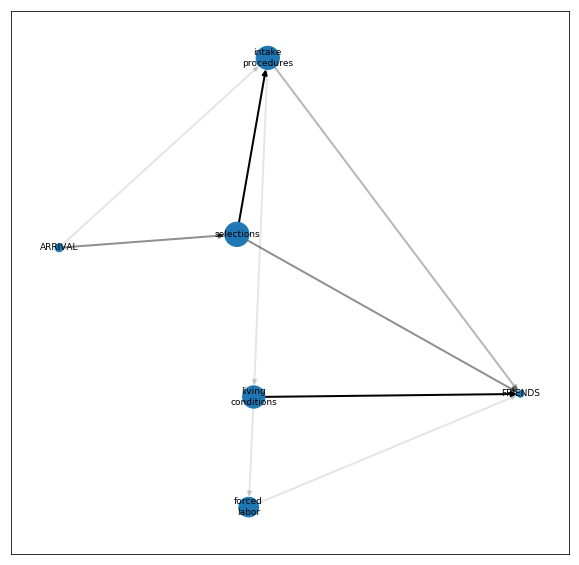

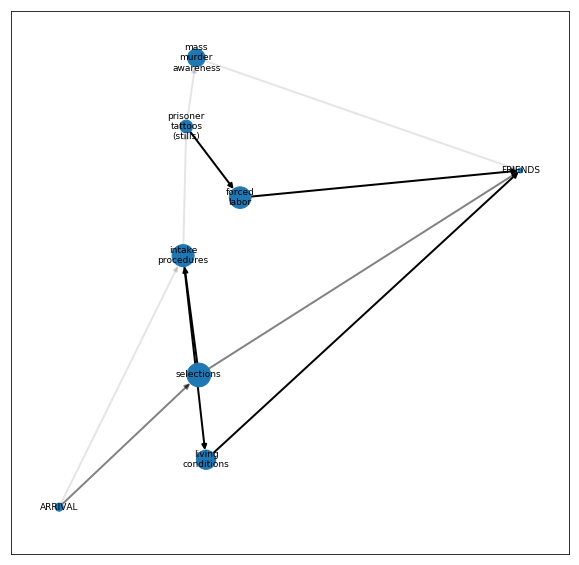

In [416]:
flux = 0.17
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 1

In [384]:
story_start = 'living conditions'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [388]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [389]:
print_similar_paths(flux_w,flux_m)

living conditions-camp adaptation methods-friends
Women: 2.8453985144436293
Men: 3.213141994177019


living conditions-mass murder awareness-friends
Women: 2.5209746424493553
Men: 3.912162182837562


living conditions-forced labor-friends
Women: 4.607510882266444
Men: 4.670050054392488


living conditions-friends
Women: 7.186269105921992
Men: 4.987467244255548


living conditions-selections-friends
Women: 5.262289350675571
Men: 4.181861662662014


living conditions-food-friends
Women: 3.7173273244734077
Men: 2.806933358478007




### Visualize it

5 labels to show
6 labels to show


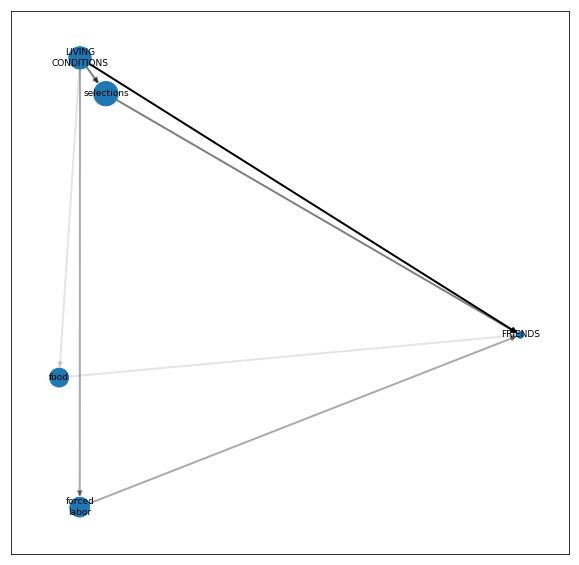

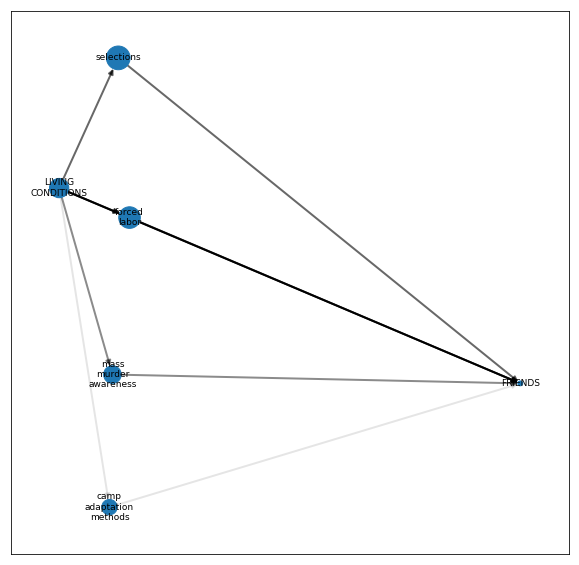

In [396]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [401]:
story_start = 'forced labor'
story_end = 'friends'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [402]:
tory_start = 'living conditions'
story_end = 'friends'
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=0.3)

In [403]:
print_similar_paths(flux_w,flux_m)

forced labor-living conditions-friends
Women: 4.58630255357244
Men: 4.212062291271698


forced labor-camp adaptation methods-friends
Women: 3.564932038139334
Men: 2.6400307313595426


forced labor-mass murder awareness-friends
Women: 2.515296283608584
Men: 2.1502372877645426


forced labor-friends
Women: 5.134709271710951
Men: 4.946899219077014




## Observation 6

### Qualitative description

Women are more likely to discuss living conditions following friendship than man do. Similarly women are more likely to discuss forced laboru followng friendship:

friends-living conditions <br/>
Women: 3.535931711450818 <br/>
Men: 2.198317704062195 <br/>

For women food is an important transitionary topic:

friends-food-living conditions:3.5758882151694316


Similarly, women are much more likely to follow with forced labour after friendship:

friends-forced labor <br/>
Women: 7.431426222661657 <br/>
Men: 2.6768092638626446 <br/>

Aid giving is a more important transitionary topic between friends and forced labor:

friends-aid giving-forced labor <br/>
Women: 1.5338897117404788 <br/>
Men: 0.36132920515314015 <br/>

For women food is an important transitionary topic between friends and forced labor.

friends-food-forced labor:3.557599215626483 <br/>




## Quantitative evidence 1

In [443]:
story_start = 'friends'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Print those paths where forced labor follow friends for women

In [456]:
result = []

for path in flux_w:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

friends-forced labor-departure
2.782018710473601
friends-forced labor-aid giving-selections-intake procedures-living conditions-departure
1.09605318176042
friends-forced labor-food-sanitary conditions-departure
1.0626340983411744
friends-forced labor-SS/SD personnel-departure
0.9205072729857041
friends-forced labor-brutal treatment-selections-intake procedures-living conditions-camp procedures-departure
0.6001628772474562
friends-forced labor-food acquisition-selections-intake procedures-psychological reactions-post-World War II reflections-departure
0.21039906165913524


Print the total amount of traffic going through these nodes

In [457]:
print (np.array(result).sum())

6.671775202467491


Print those paths where forced labor follow friends for men

In [458]:
result = []

for path in flux_m:
    if len(path.split('friends-forced labor-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

friends-forced labor-food-selections-intake procedures-living conditions-camp adaptation methods-departure
2.3717404140116094
friends-forced labor-camp adaptation methods-transfer to camps-transfers, means of transport-transfer corpses-Jewish persecution bystander responses-attitudes toward Germany and/or Germans-future message-loved ones' introductions-intergenerational genocide impact-testimony-sharing motivations-departure
0.14381297469015644
friends-forced labor-corpse cremations-personal property seizure-family interactions-camp adaptation methods-transfer to camps-transfer corpses-Jewish persecution bystander responses-attitudes toward Germany and/or Germans-future message-concentration camps (stills)-departure
0.006346712514208808


Print the total amount of traffic going through these nodes

In [459]:
print (np.array(result).sum())

2.5219001012159747


Print those paths where living conditions follow friends for women

In [460]:
result = []

for path in flux_w:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])

friends-living conditions-selections-transfer to camps-departure
2.53109801932469
friends-living conditions-Appell-selections-intake procedures-prisoner tattoos-departure
0.500104390352298
friends-living conditions-food-barter-departure
0.19352205251622487


Print the total amount of traffic going through these nodes

In [461]:
print (np.array(result).sum())

3.2247244621932127


Print those paths where living conditions follow friends for women

In [462]:
result = []

for path in flux_m:
    if len(path.split('friends-living conditions-'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])

friends-living conditions-selections-intake procedures-housing conditions-Appell-departure
1.9836312566283467
friends-living conditions-Sonderkommando prisoners-selections-intake procedures-prisoner tattoos-Appell-corpses-Jewish prisoners-warnings-departure
0.044940939809135654
friends-living conditions-forced labor-discussions-departure
0.013451889844688645
friends-living conditions-food-loved ones' renewed contacts-departure
0.0025383744535710036


Print the total amount of traffic going through these nodes

In [463]:
print (np.array(result).sum())

2.044562460735742


### Visualize

In [438]:
story_start = 'friends'
story_end = 'departure'

9 labels to show
11 labels to show


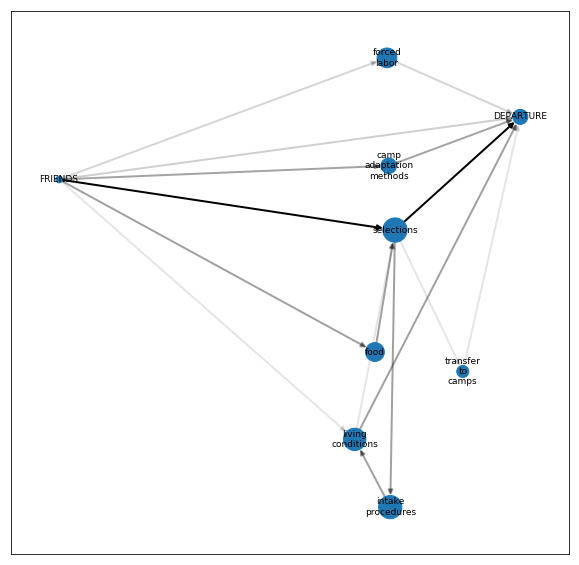

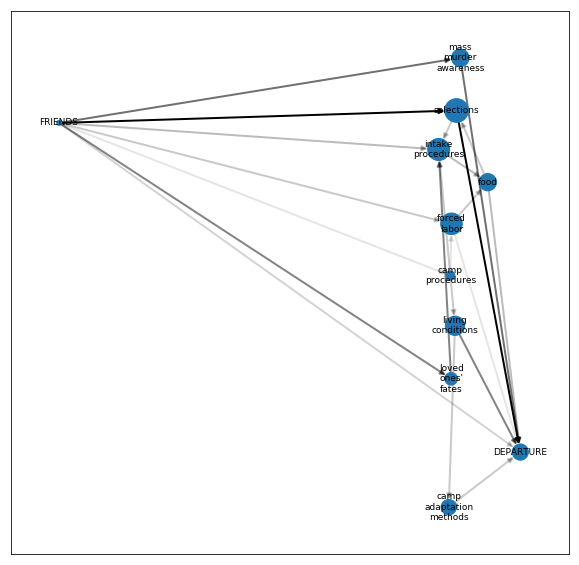

In [442]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res = visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

### Quantitative evidence 2

In [496]:
story_start = 'friends'
story_end = 'living conditions'
state_index = features_df.KeywordLabel.to_list()

In [497]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [498]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

In [499]:
print_paths(flux_w,max_length=3)

friends-forced labor-aid giving:6.707407115489016


friends-selections-aid giving:5.427121616259672


friends-camp adaptation methods-aid giving:3.3758016317748982


friends-social relations-aid giving:2.5252273920475585


friends-Appell-aid giving:2.0022463998537554


friends-aid giving:1.9789089838040406


friends-intake procedures-aid giving:1.9266493765344026


friends-extended family members-aid giving:1.382728316577591


friends-camp childbearing-aid giving:0.7369435813513183


friends-beatings-aid giving:0.731001536955184


friends-Jewish prisoners-aid giving:0.48017589720542103


friends-corpses-aid giving:0.39524911792793


friends-transfer preparations-aid giving:0.3118948130674442


friends-Sonderkommando prisoners-aid giving:0.16107054500816897


friends-physical hygiene maintenance-aid giving:0.14439013142511212


friends-malnutrition-aid giving:0.10307125466607792


friends-ghetto personnel-aid giving:0.0746796494594971




Print the most important pathways for men

In [500]:
print_paths(flux_m,max_length=3)

friends-intake procedures-aid giving:2.414530380359889


friends-social relations-aid giving:2.062921610791577


friends-Blockälteste-aid giving:1.0560553463423044


friends-survival explanations-aid giving:1.022745673091853


friends-showers-aid giving:0.605165370857494


friends-aid giving:0.4285773765946193


friends-Czechoslovak prisoners-aid giving:0.3649306548266501


friends-smuggling-aid giving:0.20074617560320288


friends-selections-aid giving:0.11639422393786059


friends-quarantines-aid giving:0.11473347245116536


friends-German camp personnel-aid giving:0.11320345605612178




Print similar pathways

In [501]:
print_similar_paths(flux_w,flux_m)

friends-intake procedures-aid giving
Women: 1.9266493765344026
Men: 2.414530380359889


friends-social relations-aid giving
Women: 2.5252273920475585
Men: 2.062921610791577


friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193




In [490]:
story_start = 'friends'
story_end = 'forced labor'
state_index = features_df.KeywordLabel.to_list()

In [491]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [492]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

Print the most important pathways for women

In [493]:
print_paths(flux_w,max_length=3)

friends-forced labor:7.431426222661657


friends-food-forced labor:3.557599215626483


friends-prisoner tattoos (stills)-forced labor:3.0073607202163912


friends-Appell-forced labor:2.917422609120034


friends-camp adaptation methods-forced labor:2.857365661752353


friends-aid giving-forced labor:1.5338897117404788


friends-social relations-forced labor:1.4380939592743114


friends-loved ones' fates-forced labor:1.0947089313477423


friends-punishments-forced labor:0.8836258763287674


friends-beatings-forced labor:0.7459974999711553


friends-orchestras-forced labor:0.7088032066329422


friends-mass murder awareness-forced labor:0.6334788092477656


friends-diseases-forced labor:0.6168556297955489


friends-environmental conditions-forced labor:0.5860582298022722


friends-prisoner physical conditions-forced labor:0.538973646647829


friends-food additives-forced labor:0.529500380257407


friends-kapos-forced labor:0.5044871781240892


friends-survival explanations-forced labor:0.4

Print the most important pathways for men

In [494]:
print_paths(flux_m,max_length=3)

friends-mass murder awareness-forced labor:3.369211978990227


friends-forced labor:2.6768092638626446


friends-loved ones' fates-forced labor:2.243211793959696


friends-camp procedures-forced labor:2.047909865819119


friends-social relations-forced labor:1.8284829247886554


friends-camp adaptation methods-forced labor:1.8018361984460016


friends-kapos-forced labor:1.5700906209765293


friends-departure-forced labor:1.5433416913751605


friends-prisoner tattoos (stills)-forced labor:1.5130161979477628


friends-crematoria-forced labor:1.4630456696694802


friends-housing conditions-forced labor:1.4441470756986292


friends-brutal treatment-forced labor:1.3691239148122605


friends-selections-forced labor:1.3264769675684294


friends-prisoner insignia-forced labor:1.2012981172575534


friends-quarantines-forced labor:1.130491099349164


friends-children-forced labor:1.0835231533389946


friends-transfer to camps-forced labor:0.9861766846573137


friends-hiding and evasion-forced la

In [502]:
print_similar_paths(flux_w,flux_m)

friends-intake procedures-aid giving
Women: 1.9266493765344026
Men: 2.414530380359889


friends-social relations-aid giving
Women: 2.5252273920475585
Men: 2.062921610791577


friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193




## Observation 7

## Qualitative description

If we look at all possible narrative pathways that can connect arrival to and departure from Birkenau, we can see that a significant amount of traffic is going through aid giving  and social bonds. Their significance can be understood if they are compared to Appel. The amount of traffic going through friendship  and food sharing is less significant. 

In case of women, more traffic is going through these nodes, with an exception of aid giving:

•    social bonds: 3.47 %

•    aid giving: 2.46 %

•    friendship: 0.85 $

•    food sharing: 0.35 %

In case of men, less traffic is going through these nodes:

•.	 social bonds: 2.46 %

•    aid giving: 2.6 %

•    friendship: 0.24 %

•    food sharing: 0.29 %

#### Total traffic going through them in the complete dataset (men and women):

In [503]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_complete = calculate_flux(data_set_1_complete,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_complete_dataset_2 = calculate_flux(data_set_2_complete,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


Calculate the total traffic going through social bonds

In [504]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []
total_escapes = []

In [505]:
for i,element in enumerate(flux_complete):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_complete[element])
print(np.array(total_social_bonds).sum())

2.9361759723023995


Calculate the total traffic going through aid giving

In [506]:
for i,element in enumerate(flux_complete):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_complete[element])
print(np.array(total_aid_giving).sum())

2.6717827843064574


Calculate the total traffic going through Appell

In [507]:
for i,element in enumerate(flux_complete):
    if 'Appell' in element.split('-'):
        total_appell.append(flux_complete[element])
print(np.array(total_appell).sum())

12.190907134349045


Calculate the total traffic going through escape

In [508]:
for i,element in enumerate(flux_complete):
    if 'escapes' in element.split('-'):
        total_escapes.append(flux_complete[element])
print(np.array(total_escapes).sum())

0.03714920335464339


Calculate the total traffic going through friendship

In [509]:
for i,element in enumerate(flux_complete):
    if 'friends' in element.split('-'):
        total_friends.append(flux_complete[element])
print(np.array(total_friends).sum())

0.5376218614701348


Calculate the total traffic going through food sharing

In [510]:
for i,element in enumerate(flux_complete):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_complete[element])
print(np.array(total_food_sharing).sum())

0.3785032595815108


#### Total traffic going through them in the dataset of women

In [511]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_w_dataset_2 = calculate_flux(data_set_2_w,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [512]:
len(flux_w)

591

In [513]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []

Calculate the total traffic going through social bonds

In [514]:
for i,element in enumerate(flux_w):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_w[element])
print(np.array(total_social_bonds).sum())

3.474288919133106


Calculate the total traffic going through aid giving

In [515]:
for i,element in enumerate(flux_w):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_w[element])
print(np.array(total_aid_giving).sum())

2.4642121645175594


Calculate the total traffic going through friendship

In [516]:
for i,element in enumerate(flux_w):
    if 'friends' in element.split('-'):
        total_friends.append(flux_w[element])
print(np.array(total_friends).sum())

0.858955786462983


Calculate the total traffic going through food sharing

In [517]:
for i,element in enumerate(flux_w):
    if 'food sharing' in element.split('-'):
        total_food_sharing.append(flux_w[element])
        #print (element)
        #print (flux_w[element])
print(np.array(total_food_sharing).sum())

0.35292251677209735


#### Total traffic going through them in the dataset of men

In [518]:
story_start = 'arrival'
story_end = 'departure'
flux = 1
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
#flux_m_dataset_2 = calculate_flux(data_set_2_m,features_df_2.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [519]:
total_social_bonds = []
total_aid_giving = []
total_appell = []
total_friends = []
total_food_sharing = []



Calculate the total traffic going through social bonds

In [520]:
for i,element in enumerate(flux_m):
    if 'social relations' in element.split('-'):
        total_social_bonds.append(flux_m[element])
print(np.array(total_social_bonds).sum())

2.4630332857629655


Calculate the total traffic going through aid giving

In [521]:
for i,element in enumerate(flux_m):
    if 'aid giving' in element.split('-'):
        total_aid_giving.append(flux_m[element])
print(np.array(total_aid_giving).sum())

2.582800743516971


Calculate the total traffic going through friendship

In [522]:
for i,element in enumerate(flux_m):
    if 'friends' in element.split('-'):
        total_friends.append(flux_m[element])
print(np.array(total_friends).sum())

0.2462599967198602


Calculate the total traffic going through food sharing

In [523]:
total_food_sharing = []

In [524]:
for i,element in enumerate(flux_m):
    if 'food sharing' in element.split('-'):
        #print (element)
        #print (flux_m[element])
        total_food_sharing.append(flux_m[element])
print(np.array(total_food_sharing).sum())

0.2926940919542161


## Observation 8

### Qualitative Description

In testimonies of women there are important narrative pathways that lead to the discussion of survival explanations and involve social bonds (friends and social relations) as states preceding survival explanations; in testimonies of men such paths have significantly less traffic (the ratio is more than 3 times for women)

At the same time, in testimonies of men, between aid giving and survival explanation there is slightly more traffic (ratio is 1.6 times).

The study of direct link has similar results:

aid giving-survival explanations <br/>
Women: 2.6696661754080866 <br/>
Men: 3.8067494674128137 <br/>

But in case of women social relations and friends are important transitionary topics:

aid giving-social relations-survival explanations:1.3752851611513381
aid giving-friends-survival explanations:0.8100798985654745

The amount of direct traffic between social relations and survival explanations is much larger for women:

social relations-survival explanations <br/>
Women: 3.3426904751901763 <br/>
Men: 0.6392835020909489 <br/>


With friends, there is slightly more traffic in case of men:

friends-survival explanations <br/>
Women: 1.9655525123995026 <br/>
Men: 2.17582398231009 <br/>



### Quantitative evidence 1

In [533]:
story_start = 'arrival'
story_end = 'survival explanations'

In [534]:
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

Find social bonds preceding survivor explanation in women narratives

In [535]:
result = []
for path in flux_w:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-housing conditions-social relations-survival explanations
2.2547144300318784


arrival-intake procedures-living conditions-friends-survival explanations
0.9322997760921696


arrival-shoes-housing conditions-Appell-selections-intake procedures-living conditions-social relations-survival explanations
0.15472006819428497


arrival-emotions-psychological distress prevention-living conditions-social relations-survival explanations
0.03994543491265819


arrival-property seizure-prisoner tattoos (stills)-living conditions-selections-intake procedures-Appell-food-social relations-survival explanations
0.005337564867344182


arrival-SS/SD personnel-intake procedures-social relations-survival explanations
0.0003647416136984268


arrival-food acquisition-selections-intake procedures-social relations-survival explanations
8.969452305760493e-05


3.3874717102350917


Print the total amount of traffic going through these nodes

In [536]:
print (np.array(result).sum())

3.3874717102350917


Find aid giving in women narratives

In [537]:
result = []
for path in flux_w:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_w[path])
        result.append(flux_w[path])
        print ('\n')
print (np.array(result).sum())

arrival-intake procedures-prisoner tattoos (stills)-forced labor-aid giving-survival explanations
2.032956399535339


2.032956399535339


Print the total amount of traffic going through these nodes

In [538]:
print (np.array(result).sum())

2.032956399535339


Find social bonds preceding survivor explanation in men narratives

In [539]:
result = []
for path in flux_m:
    if len(path.split('-social relations-survival explanations'))>1 or len(path.split('-friends-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-loved ones' fates-intake procedures-food-selections-medical experiments-post-conflict medical problems-friends-survival explanations
0.6215828651848473


arrival-camp adaptation methods-departure-freight trains-selections-intake procedures-housing conditions-Appell-social relations-survival explanations
0.31219525142050947


arrival-interviewee memory-intake procedures-prisoner tattoos-forced labor-beatings-social relations-survival explanations
0.0938158448215383


1.027593961426895


Print the total amount of traffic going through these nodes

In [540]:
print (np.array(result).sum())

1.027593961426895


Find aid giving preceding survivor explanation in women narratives

In [541]:
result = []
for path in flux_m:
    if len(path.split('-aid giving-survival explanations'))>1:
        print (path)
        print (flux_m[path])
        result.append(flux_m[path])
        print ('\n')
print (np.array(result).sum())

arrival-selections-intake procedures-living conditions-camp adaptation methods-aid giving-survival explanations
1.9747229803809814


arrival-kapos-selections-intake procedures-prisoner tattoos-forced labor-aid giving-survival explanations
0.6391633927462611


arrival-Soviet armed forces-liberation-related aid giving-post-conflict medical problems-mass murder awareness-departure-freight trains-transfer conditions-intake procedures-housing conditions-social relations-aid giving-survival explanations
0.003175935867285176


2.6170623089945275


Print the total amount of traffic going through these nodes

In [542]:
print (np.array(result).sum())

2.6170623089945275


### Quantitative evidence 2

In [544]:
story_start = 'aid giving'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [545]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [546]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [549]:
print_paths(flux_w,max_length=3)

aid giving-selections-survival explanations:5.55566151805494


aid giving-forced labor-survival explanations:3.5561139718303987


aid giving-camp adaptation methods-survival explanations:3.118721954413443


aid giving-survival explanations:2.6696661754080866


aid giving-departure-survival explanations:2.090395792520972


aid giving-Mengele, Josef-survival explanations:2.0598757299505


aid giving-social relations-survival explanations:1.3752851611513381


aid giving-loved ones' renewed contacts-survival explanations:0.8985762248585095


aid giving-Jewish prisoners-survival explanations:0.8494919864268924


aid giving-friends-survival explanations:0.8100798985654745


aid giving-medical care-survival explanations:0.6816946621056545


aid giving-children-survival explanations:0.5509103854822205


aid giving-preferential treatment-survival explanations:0.5365026647746822


aid giving-camp childbearing-survival explanations:0.4638039086758713


aid giving-deaths-survival explanations:0.42

In [550]:
print_paths(flux_m,max_length=3)

aid giving-selections-survival explanations:4.9666939897010005


aid giving-survival explanations:3.8067494674128137


aid giving-forced labor-survival explanations:3.530908137470878


aid giving-food-survival explanations:1.5241451647641429


aid giving-extended family members-survival explanations:0.8474256639552825


aid giving-medical care-survival explanations:0.6026391275098797


aid giving-German camp personnel-survival explanations:0.5320086499151765


aid giving-killings-survival explanations:0.4120213988677098


aid giving-warnings-survival explanations:0.28755272334834087


aid giving-Czechoslovak prisoners-survival explanations:0.19958768604328778


aid giving-hiding (aid giving)-survival explanations:0.13009000075996466


aid giving-deportation procedures-survival explanations:0.055873450434574055


aid giving-loved ones' separations-survival explanations:0.023870218633866524




In [547]:
print_similar_paths(flux_w,flux_m)

aid giving-warnings-survival explanations
Women: 0.29550838165361915
Men: 0.28755272334834087


aid giving-medical care-survival explanations
Women: 0.6816946621056545
Men: 0.6026391275098797


aid giving-selections-survival explanations
Women: 5.55566151805494
Men: 4.9666939897010005


aid giving-forced labor-survival explanations
Women: 3.5561139718303987
Men: 3.530908137470878


aid giving-survival explanations
Women: 2.6696661754080866
Men: 3.8067494674128137




In [551]:
story_start = 'social relations'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [552]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [553]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [554]:
print_paths(flux_w,max_length=3)

social relations-selections-survival explanations:5.520460150007221


social relations-forced labor-survival explanations:3.543658042119795


social relations-survival explanations:3.3426904751901763


social relations-camp adaptation methods-survival explanations:3.107409979382048


social relations-prisoner tattoos-survival explanations:1.0446362157375175


social relations-preferential treatment-survival explanations:0.6621088787819384


social relations-Jewish prisoners-survival explanations:0.6258915046135531


social relations-crematoria-survival explanations:0.5171274163068087


social relations-Jewish religious observances-survival explanations:0.3793154792264602


social relations-Polish kapos-survival explanations:0.2895653867099425


social relations-female camp personnel-survival explanations:0.19998965027877608


social relations-suicide decisions-survival explanations:0.17823548746827003


social relations-attitudes toward prisoner functionaries-survival explanations:0.17

In [555]:
print_paths(flux_m,max_length=3)

social relations-selections-survival explanations:4.992832245668052


social relations-forced labor-survival explanations:3.5605200965601678


social relations-living conditions-survival explanations:3.075170821185688


social relations-killings-survival explanations:1.2787020978106247


social relations-survival explanations:0.6392835020909489


social relations-political prisoners-survival explanations:0.29206568812388534


social relations-camp blood extraction-survival explanations:0.2640332532459746


social relations-Czechoslovak prisoners-survival explanations:0.20259296942277735


social relations-cultural activities-survival explanations:0.18076764187767663




In [556]:
print_similar_paths(flux_w,flux_m)

social relations-survival explanations
Women: 3.3426904751901763
Men: 0.6392835020909489


social relations-forced labor-survival explanations
Women: 3.543658042119795
Men: 3.5605200965601678


social relations-selections-survival explanations
Women: 5.520460150007221
Men: 4.992832245668052




In [557]:
story_start = 'friends'
story_end = 'survival explanations'
state_index = features_df.KeywordLabel.to_list()

In [558]:
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [559]:
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=1)

In [560]:
print_paths(flux_w,max_length=3)

friends-selections-survival explanations:5.5154924828619105


friends-camp adaptation methods-survival explanations:3.1079630886816383


friends-survival explanations:1.9655525123995026


friends-prisoner tattoos (stills)-survival explanations:0.2870988395990053


friends-female camp guards-survival explanations:0.08040650787750901


friends-frostbite-survival explanations:0.027245068210518513




In [561]:
print_paths(flux_m,max_length=3)

friends-selections-survival explanations:4.9063550801458655


friends-loved ones' fates-survival explanations:4.246030752980183


friends-survival explanations:2.17582398231009


friends-kapos-survival explanations:1.2962659771889928


friends-prisoner identification numbers-survival explanations:1.253079290926368


friends-German camp personnel-survival explanations:0.14759270557262283




In [562]:
print_similar_paths(flux_w,flux_m)

friends-survival explanations
Women: 1.9655525123995026
Men: 2.17582398231009


friends-selections-survival explanations
Women: 5.5154924828619105
Men: 4.9063550801458655




## Visualize


Notice that social bonds are "missing" from the plot showing men

7 labels to show
7 labels to show


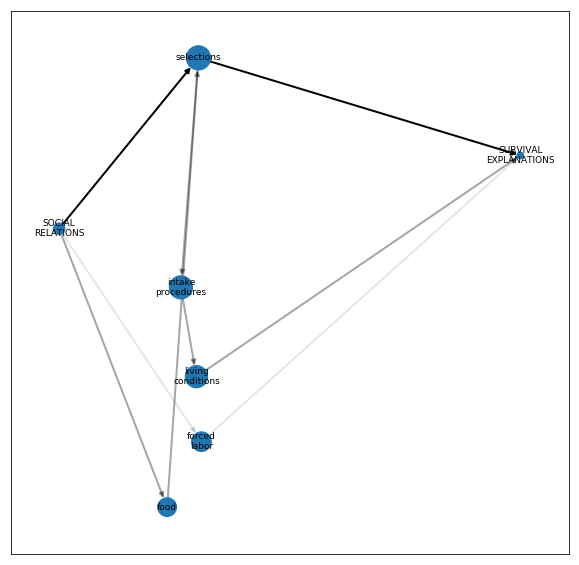

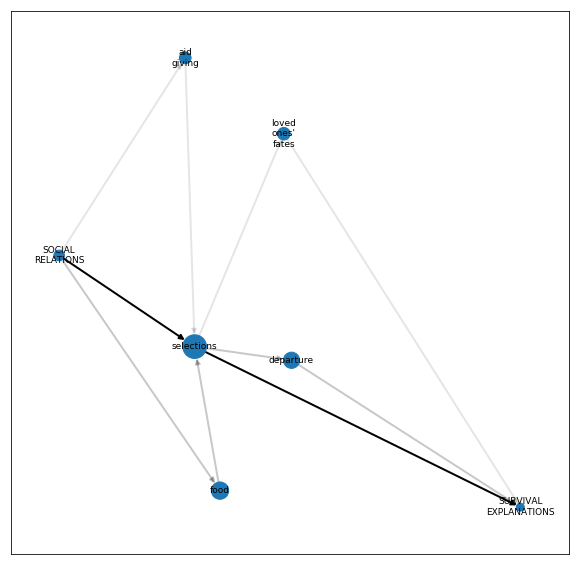

In [564]:
story_start = 'social relations'
story_end = 'survival explanations'
flux = 0.1
res=visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 9

### Qualitative description

The moment when one particularly needed the help of others was the selection, when the ill and those who were unable to work were selected to be sent to gas chambers. In testimonies we can often read that victims helped each other in these moments (for instance by hiding or holding the ill); yet victims attribute their survival of selections to the help of their peers and friends. This narrative frame corresponds to the following narrative pathways:
- selections-social relations-survival explanations
- selections-friends-survival explanations
- selections-aid giving-survival explanations

These narrative pathways are more significant in testimonies of women than men.

In case of women:

selections-aid giving-survival explanations:1.372566897382252
selections-social relations-survival explanations:0.8517907825853956
selections-friends-survival explanations:0.4084233290441179

In case of men:

selections-aid giving-survival explanations:0.9130792244020753
selections-friends-survival explanations: 0.22597524390714183
no path with social relations


Men and women are equally likely to connect selection with survival explanations:

selections-survival explanations
Women: 5.995184312276154
Men: 5.573167275281716

Similarly, another moment when one needed the help of others was the Appel, again women discuss Appel survivor explanations with friends and social relations as transitionary topics:

Appell-social relations-survival explanations:1.2750393765030372
Appell-friends-survival explanations:0.35100749020630817


### Quantitative evidence 1

In [586]:
story_start = 'selections'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [590]:
print_paths(flux_w,max_length=4)

Appell-selections-survival explanations:5.550793726117133


Appell-living conditions-survival explanations:4.1436871185406945


Appell-forced labor-survival explanations:3.567867469030964


Appell-survival explanations:3.180359978960981


Appell-mass murder awareness-survival explanations:3.167122615564445


Appell-camp adaptation methods-survival explanations:2.6848555917173385


Appell-food-survival explanations:1.2965955428301026


Appell-social relations-survival explanations:1.2750393765030372


Appell-family interactions-survival explanations:1.1997322331453693


Appell-Blockälteste-survival explanations:1.1058507994984956


Appell-food-sanitary conditions-survival explanations:0.8394054345861964


Appell-food-prisoner physical conditions-survival explanations:0.8232997503023639


Appell-diseases-survival explanations:0.7617818064153394


Appell-SS/SD personnel-survival explanations:0.7614236952964462


Appell-selections-intake procedures-survival explanations:0.7509360331634636


In [588]:
print_paths(flux_m,max_length=3)

Appell-selections-survival explanations:4.9841163054912485


Appell-forced labor-survival explanations:3.561265434386713


Appell-living conditions-survival explanations:3.080407265767201


Appell-food-survival explanations:1.5667740664908705


Appell-prisoner tattoos (stills)-survival explanations:1.4071987288054013


Appell-aid giving-survival explanations:1.252313813136117


Appell-psychological reactions-survival explanations:1.2495639210251945


Appell-killings-survival explanations:1.1947688082919823


Appell-extended family members-survival explanations:1.146615865278586


Appell-family interactions-survival explanations:1.0864410146057304


Appell-survival explanations:1.068469380043107


Appell-criminal prisoners-survival explanations:0.6868992835173692


Appell-hangings-survival explanations:0.3691620844812717


Appell-Czechoslovak prisoners-survival explanations:0.20144814244452305




In [589]:
print_similar_paths(flux_w,flux_m)

Appell-killings-survival explanations
Women: 0.31816534797722074
Men: 1.1947688082919823


Appell-food-selections-departure-survival explanations
Women: 2.087667690387609
Men: 3.774169095531219


Appell-living conditions-survival explanations
Women: 4.1436871185406945
Men: 3.080407265767201


Appell-selections-survival explanations
Women: 5.550793726117133
Men: 4.9841163054912485


Appell-food-survival explanations
Women: 1.2965955428301026
Men: 1.5667740664908705


Appell-family interactions-survival explanations
Women: 1.1997322331453693
Men: 1.0864410146057304


Appell-forced labor-survival explanations
Women: 3.567867469030964
Men: 3.561265434386713


Appell-survival explanations
Women: 3.180359978960981
Men: 1.068469380043107




In [601]:
story_start = 'kapos'
story_end = 'survival explanations'
flux = 1
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [590]:
print_paths(flux_w,max_length=4)

Appell-selections-survival explanations:5.550793726117133


Appell-living conditions-survival explanations:4.1436871185406945


Appell-forced labor-survival explanations:3.567867469030964


Appell-survival explanations:3.180359978960981


Appell-mass murder awareness-survival explanations:3.167122615564445


Appell-camp adaptation methods-survival explanations:2.6848555917173385


Appell-food-survival explanations:1.2965955428301026


Appell-social relations-survival explanations:1.2750393765030372


Appell-family interactions-survival explanations:1.1997322331453693


Appell-Blockälteste-survival explanations:1.1058507994984956


Appell-food-sanitary conditions-survival explanations:0.8394054345861964


Appell-food-prisoner physical conditions-survival explanations:0.8232997503023639


Appell-diseases-survival explanations:0.7617818064153394


Appell-SS/SD personnel-survival explanations:0.7614236952964462


Appell-selections-intake procedures-survival explanations:0.7509360331634636


In [588]:
print_paths(flux_m,max_length=3)

Appell-selections-survival explanations:4.9841163054912485


Appell-forced labor-survival explanations:3.561265434386713


Appell-living conditions-survival explanations:3.080407265767201


Appell-food-survival explanations:1.5667740664908705


Appell-prisoner tattoos (stills)-survival explanations:1.4071987288054013


Appell-aid giving-survival explanations:1.252313813136117


Appell-psychological reactions-survival explanations:1.2495639210251945


Appell-killings-survival explanations:1.1947688082919823


Appell-extended family members-survival explanations:1.146615865278586


Appell-family interactions-survival explanations:1.0864410146057304


Appell-survival explanations:1.068469380043107


Appell-criminal prisoners-survival explanations:0.6868992835173692


Appell-hangings-survival explanations:0.3691620844812717


Appell-Czechoslovak prisoners-survival explanations:0.20144814244452305




In [589]:
print_similar_paths(flux_w,flux_m)

Appell-killings-survival explanations
Women: 0.31816534797722074
Men: 1.1947688082919823


Appell-food-selections-departure-survival explanations
Women: 2.087667690387609
Men: 3.774169095531219


Appell-living conditions-survival explanations
Women: 4.1436871185406945
Men: 3.080407265767201


Appell-selections-survival explanations
Women: 5.550793726117133
Men: 4.9841163054912485


Appell-food-survival explanations
Women: 1.2965955428301026
Men: 1.5667740664908705


Appell-family interactions-survival explanations
Women: 1.1997322331453693
Men: 1.0864410146057304


Appell-forced labor-survival explanations
Women: 3.567867469030964
Men: 3.561265434386713


Appell-survival explanations
Women: 3.180359978960981
Men: 1.068469380043107




### Visualization

9 labels to show
10 labels to show


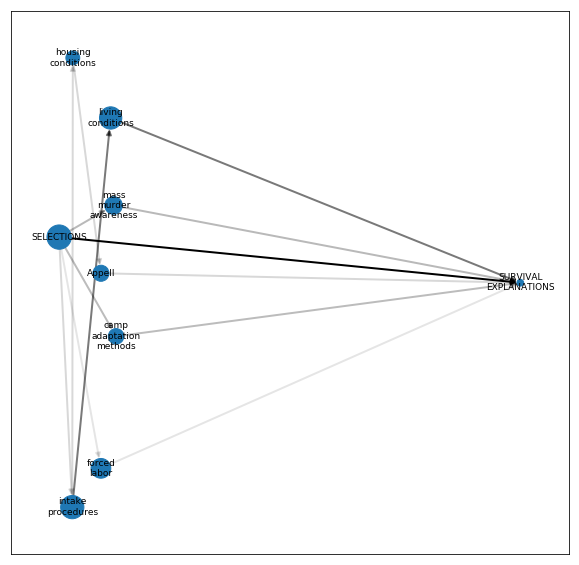

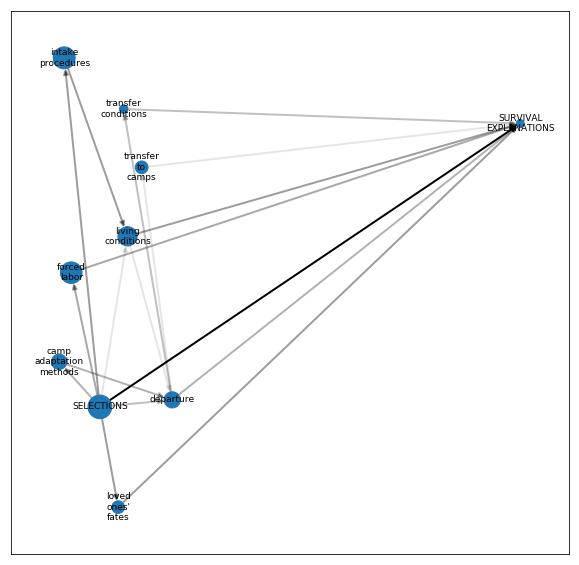

In [592]:
flux = 0.2
res = visualize_most_important_paths(data_set_1_w,flux,features_df,['selections'],story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,['selections'],story_end,None)

## Observation 10

### Qualitative description

Social relations and aid giving are closely connected in narratives of both men and women; (slightly more connected for men). For women, the most important transitionary topic is living conditions and selection, for men it is forced labor.

social relations-forced labor-aid giving <br/>
Women: 2.8948768437334533 <br/>
Men: 6.7009466811388885 <br/>


social relations-living conditions-aid giving <br/>
Women: 3.2443759794384 <br/>
Men: 1.9733942618306775 <br/>


### Quantitative evidence

In [602]:
flux = 1
story_start = 'social relations'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [604]:
print_paths(flux_w,max_length=3)

social relations-selections-aid giving:5.371886618798146


social relations-aid giving:5.197347732237376


social relations-living conditions-aid giving:3.2443759794384


social relations-camp adaptation methods-aid giving:3.2284443490518653


social relations-forced labor-aid giving:2.8948768437334533


social relations-mass murder awareness-aid giving:2.846868521229434


social relations-family interactions-aid giving:1.9746099158818775


social relations-prisoner physical conditions-aid giving:1.3950415654757369


social relations-extended family members-aid giving:1.3654739375366083


social relations-camp childbearing-aid giving:0.8197082468610563


social relations-SS/SD personnel-aid giving:0.7728594497769102


social relations-sustenance provision-aid giving:0.7668783272809403


social relations-beatings-aid giving:0.7205914354339934


social relations-prisoner external contact-aid giving:0.6897248671337319


social relations-diseases-aid giving:0.6700584901007348


social rela

In [605]:
print_paths(flux_m,max_length=3)

social relations-aid giving:7.363992537011043


social relations-forced labor-aid giving:6.7009466811388885


social relations-camp adaptation methods-aid giving:4.215922136512684


social relations-selections-aid giving:3.350525385527081


social relations-mass murder awareness-aid giving:2.398991864027975


social relations-living conditions-aid giving:1.9733942618306775


social relations-family interactions-aid giving:1.0487253736983906


social relations-Jewish prisoners-aid giving:0.8594477118009037


social relations-extended family members-aid giving:0.785692308876546


social relations-sustenance provision-aid giving:0.7172271269519214


social relations-Jewish prisoner functionaries-aid giving:0.6403273891540887


social relations-Polish prisoners-aid giving:0.6178593018254676


social relations-cultural activities-aid giving:0.45764985529332014


social relations-Czechoslovak prisoners-aid giving:0.34009968010332914


social relations-female prisoners-aid giving:0.3250660881

In [603]:
print_similar_paths(flux_w,flux_m)

social relations-mass murder awareness-aid giving
Women: 2.846868521229434
Men: 2.398991864027975


social relations-Jewish prisoners-aid giving
Women: 0.6323947256070581
Men: 0.8594477118009037


social relations-Jewish prisoner functionaries-aid giving
Women: 0.3193824989349551
Men: 0.6403273891540887


social relations-selections-aid giving
Women: 5.371886618798146
Men: 3.350525385527081


social relations-camp adaptation methods-aid giving
Women: 3.2284443490518653
Men: 4.215922136512684


social relations-living conditions-aid giving
Women: 3.2443759794384
Men: 1.9733942618306775


social relations-Polish prisoners-aid giving
Women: 0.5155287798810995
Men: 0.6178593018254676


social relations-sustenance provision-aid giving
Women: 0.7668783272809403
Men: 0.7172271269519214


social relations-female prisoners-aid giving
Women: 0.5466084339424548
Men: 0.32506608816863275


social relations-family interactions-aid giving
Women: 1.9746099158818775
Men: 1.0487253736983906


social rel

### Visualize

8 labels to show
5 labels to show


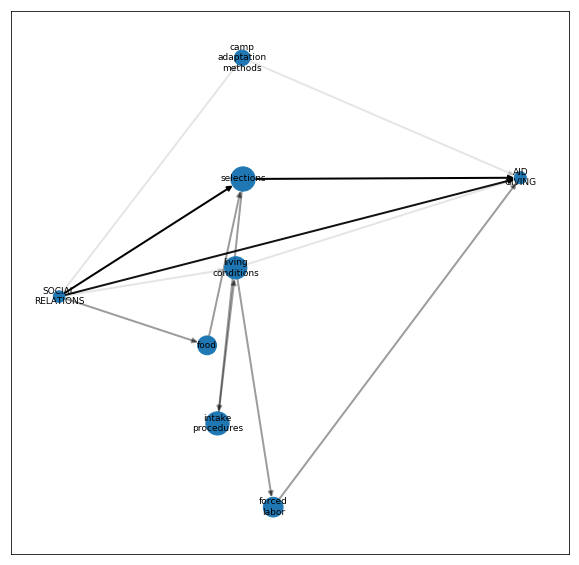

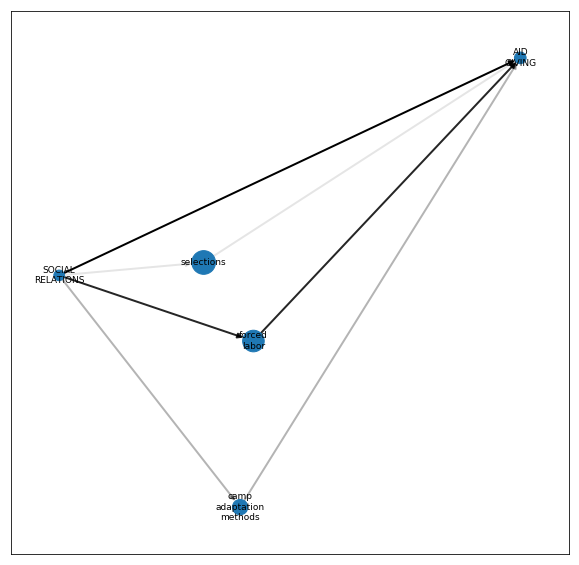

In [609]:
story_start = ['social relations']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,0.2,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,0.2,features_df,story_start,story_end,None)

## Observation 11

### Qualitative description

Friendship and aid giving are closely connected in narratives of women and they are not closely connected in narratives of men.

friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193


### Quantitative evidence

In [616]:
flux = 1
story_start = 'friends'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [620]:
print_paths(flux_w,max_length=3)

friends-forced labor-aid giving:6.707407115489016


friends-selections-aid giving:5.427121616259672


friends-camp adaptation methods-aid giving:3.3758016317748982


friends-social relations-aid giving:2.5252273920475585


friends-Appell-aid giving:2.0022463998537554


friends-aid giving:1.9789089838040406


friends-intake procedures-aid giving:1.9266493765344026


friends-extended family members-aid giving:1.382728316577591


friends-camp childbearing-aid giving:0.7369435813513183


friends-beatings-aid giving:0.731001536955184


friends-Jewish prisoners-aid giving:0.48017589720542103


friends-corpses-aid giving:0.39524911792793


friends-transfer preparations-aid giving:0.3118948130674442


friends-Sonderkommando prisoners-aid giving:0.16107054500816897


friends-physical hygiene maintenance-aid giving:0.14439013142511212


friends-malnutrition-aid giving:0.10307125466607792


friends-ghetto personnel-aid giving:0.0746796494594971




In [621]:
print_paths(flux_m,max_length=3)

friends-intake procedures-aid giving:2.414530380359889


friends-social relations-aid giving:2.062921610791577


friends-Blockälteste-aid giving:1.0560553463423044


friends-survival explanations-aid giving:1.022745673091853


friends-showers-aid giving:0.605165370857494


friends-aid giving:0.4285773765946193


friends-Czechoslovak prisoners-aid giving:0.3649306548266501


friends-smuggling-aid giving:0.20074617560320288


friends-selections-aid giving:0.11639422393786059


friends-quarantines-aid giving:0.11473347245116536


friends-German camp personnel-aid giving:0.11320345605612178




In [622]:
print_similar_paths(flux_w,flux_m,max_length=3)

friends-intake procedures-aid giving
Women: 1.9266493765344026
Men: 2.414530380359889


friends-social relations-aid giving
Women: 2.5252273920475585
Men: 2.062921610791577


friends-selections-aid giving
Women: 5.427121616259672
Men: 0.11639422393786059


friends-aid giving
Women: 1.9789089838040406
Men: 0.4285773765946193




### Visualize

5 labels to show
14 labels to show


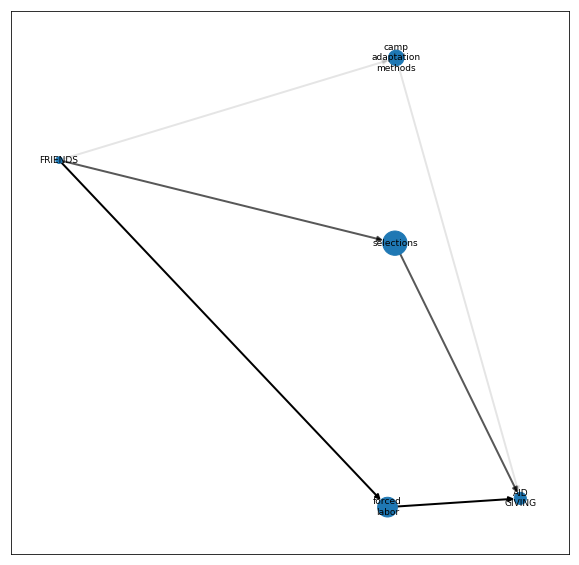

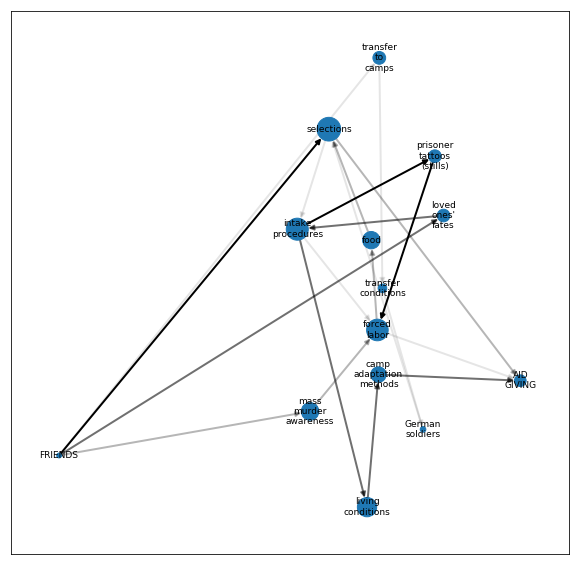

In [624]:
flux = 0.15
story_start = ['friends']
story_end = ['aid giving']
res = visualize_most_important_paths(data_set_1_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m,flux,features_df,story_start,story_end,None)

## Observation 13

In narratives of those men and women who did not work, friendship and survival explanations are more connected for women

In [815]:
flux = 0.3
story_start = 'friends'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



Path flux		%path	%of total	path
friends-living conditions-camp adaptation methods-survival explanations
5.830730454265052
friends-Appell-survival explanations
5.219393758894051
friends-mass murder awareness-housing conditions-food-selections-survival explanations
4.439077178947994
friends-selections-intake procedures-mass murder awareness-survival explanations
3.94667844027636
friends-survival explanations
3.820611836128484
friends-intake procedures-living conditions-diseases-survival explanations
3.071878042857603
friends-camp adaptation methods-departure-transfer to camps-survival explanations
3.0167243162589914
friends-loved ones' separations-intake procedures-Appell-food-Mengele, Josef-survival explanations
3.000703449652853


Path flux		%path	%of total	path
friends-camp adaptation methods-departure-survival explanations
7.371877006990826
friends-prisoner tattoos (stills)-living conditions-departure-survival explanations
6.4484728549299275
friends-mass murder awareness-selections-l

10 labels to show
10 labels to show


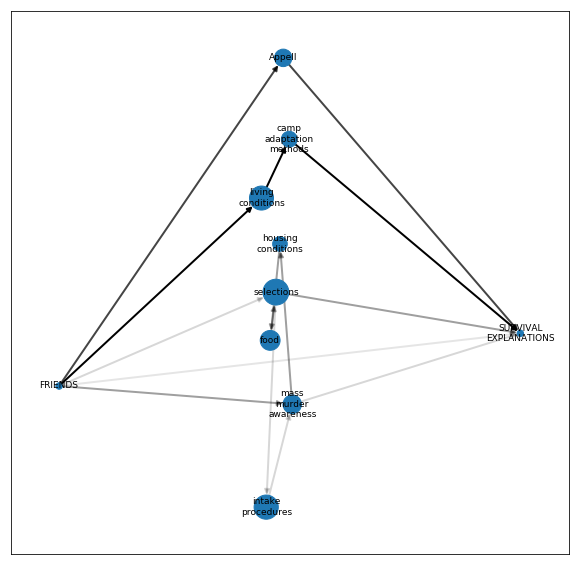

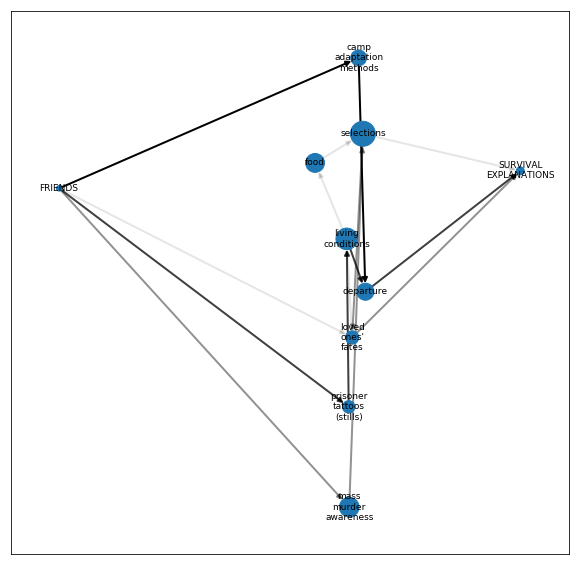

In [657]:

story_start = ['friends']
story_end = ['survival explanations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 14 A

### Qualitative description

In narratives of those men and women who did not work, social relations and living conditions are much more connected for women:

living conditions - social relations

For women 9.9% of total traffic is going through this path, whereas for men, it is 5.8%.

The following transitionary topics are present both in testimonies of women and men but with different weights:

living conditions-aid giving-social relations <br/>
Women: 1.3274897627391509 <br/>
Men: 0.6744181635044657 <br/>

living conditions-friends-social relations <br/>
Women: 0.8305450841970277 <br/>
Men: 0.522043120093434 <br/>

living conditions-Blockälteste-social relations <br/>
Women: 1.151697967923542 <br/>
Men: 0.751131993867747 <br/>

living conditions-hunger-social relations <br/>
Women: 0.3749064709578037 <br/>
Men: 1.02338128352873 <br/>

### Quantitative evidence

In [644]:
flux = 0.6
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [632]:
print_similar_paths(flux_w,flux_m)

living conditions-punishments-social relations
Women: 0.505754737734959
Men: 0.389578920090573


living conditions-hunger-social relations
Women: 0.3749064709578037
Men: 1.02338128352873


living conditions-aid giving-social relations
Women: 1.3274897627391509
Men: 0.6744181635044657


living conditions-extended family members-social relations
Women: 0.40844673780730834
Men: 0.8479912676735171


living conditions-Blockälteste-social relations
Women: 1.151697967923542
Men: 0.751131993867747


living conditions-beatings-social relations
Women: 0.6315090581973862
Men: 0.39796235785181255


living conditions-social relations
Women: 9.908706958389015
Men: 5.890004275849439


living conditions-food-social relations
Women: 6.056736616991865
Men: 7.194168861442798


living conditions-camp adaptation methods-social relations
Women: 1.7532342673393646
Men: 3.9303172383952654


living conditions-brutal treatment-social relations
Women: 0.9443085408790072
Men: 0.8145196714096133


living condition

6 labels to show
7 labels to show


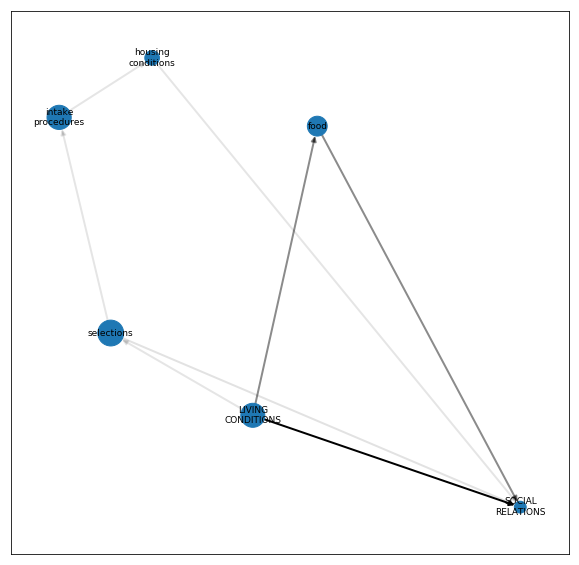

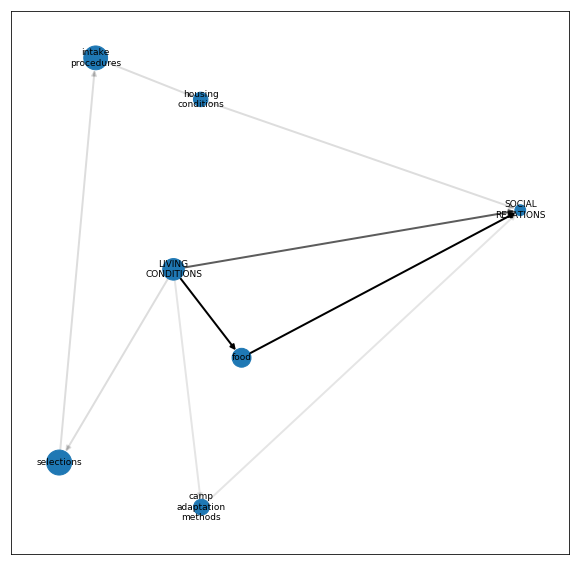

In [752]:

story_start = ['living conditions']
story_end = ['social relations']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 14

### Qualitative description

In narratives of those men and women who did not work, friendship and living conditions are much more connected for women:

friends-living conditions

For women 6.7% of total traffic is going through this path, whereas for men, it is 1.5%.

In case of women, the main transitionary topics include:


friends-aid giving-living conditions:1.1352997404787295

friends-Blockälteste-living conditions:0.9866599269050341

friends-food-living conditions:2.8081658495238724


### Quantitative evidence

In [648]:
flux = 1
story_start = 'friends'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [646]:
print_paths(flux_w,max_length=3)

living conditions-social relations:9.908706958389015


living conditions-food-social relations:6.056736616991865


living conditions-selections-social relations:3.6483120763775254


living conditions-Appell-social relations:3.2490721255108292


living conditions-mass murder awareness-social relations:3.1187452875539665


living conditions-family interactions-social relations:1.8597086347922522


living conditions-departure-social relations:1.8532099317166828


living conditions-camp adaptation methods-social relations:1.7532342673393646


living conditions-Mengele, Josef-social relations:1.6991780585590246


living conditions-sanitary conditions-social relations:1.622951630181198


living conditions-transfer to camps-social relations:1.466897799432286


living conditions-aid giving-social relations:1.3274897627391509


living conditions-camp procedures-social relations:1.15190403164474


living conditions-Blockälteste-social relations:1.151697967923542


living conditions-brutal treatm

In [641]:
print_paths(flux_m,max_length=3)

living conditions-mass murder awareness-beatings:5.6854023796438815


living conditions-food-beatings:3.715307793951868


living conditions-beatings:3.5278098991973543


living conditions-camp adaptation methods-beatings:3.3957388705851397


living conditions-departure-beatings:3.2242264536516614


living conditions-Appell-beatings:2.061288133956996


living conditions-family interactions-beatings:1.4156691050050216


living conditions-selections-beatings:1.3566329825665808


living conditions-social relations-beatings:1.3562341314636401


living conditions-loved ones' fates-beatings:1.3016741437398276


living conditions-kapos-beatings:1.2635625429713897


living conditions-camp procedures-beatings:1.2526576982789255


living conditions-forced labor-beatings:1.133870426899188


living conditions-loved ones' separations-beatings:1.1282636129470258


living conditions-uniforms-beatings:1.0468705611413884


living conditions-SS/SD personnel-beatings:0.998677288457165


living conditions-

In [636]:
print_similar_paths(flux_w,flux_m)

friends-mass murder awareness-living conditions
Women: 4.289429249173974
Men: 3.5336668118790118


friends-living conditions
Women: 6.704612554824343
Men: 1.5487337305599145


friends-selections-intake procedures-living conditions
Women: 4.021022100276521
Men: 3.1115499857950395


friends-prisoner tattoos (stills)-living conditions
Women: 1.887432491383509
Men: 4.5118247363612305


friends-Mengele, Josef-intake procedures-living conditions
Women: 2.620762935614495
Men: 2.732310160479516


friends-transfer to camps-living conditions
Women: 1.678116991808845
Men: 1.6393670913647667


friends-loved ones' fates-living conditions
Women: 0.5698542026136235
Men: 4.186632005817641


friends-punishments-living conditions
Women: 0.49557266799390737
Men: 0.7300448080293078


friends-forced labor-living conditions
Women: 0.46249240705720995
Men: 0.7665994860051376


friends-camp adaptation methods-living conditions
Women: 2.0250525605596748
Men: 1.8985696324254917


friends-social relations-living

6 labels to show
7 labels to show


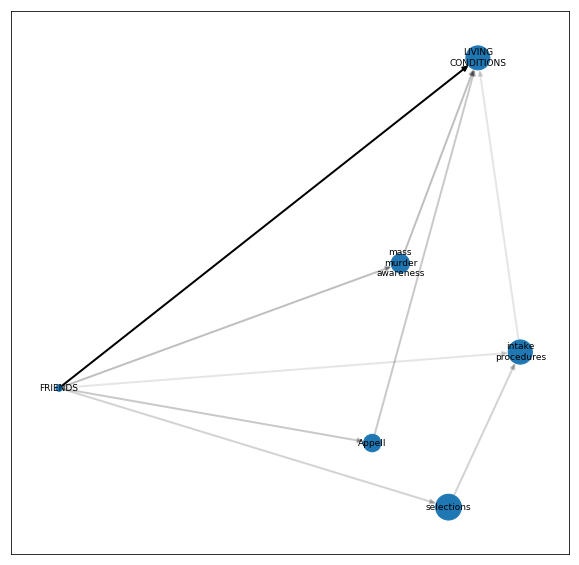

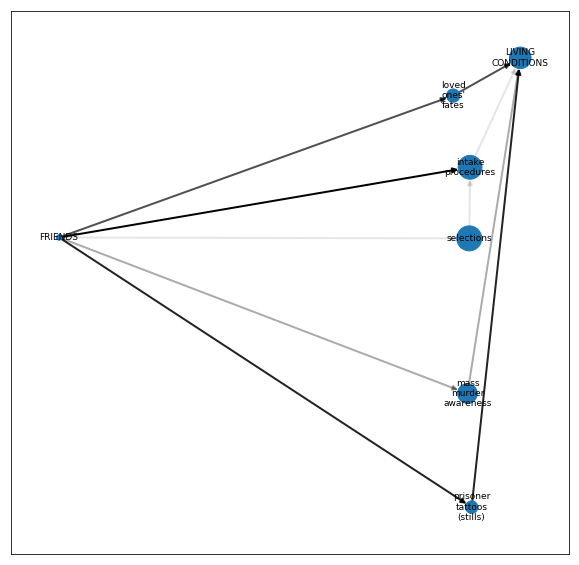

In [672]:

story_start = ['friends']
story_end = ['living conditions']
flux = 0.2
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 14 B

### Qualitative description

In narratives of those men and women who did not work, aid giving and living conditions are much more connected for women:

living conditions - aid giving

For women 7.4% of total traffic is going through this path, whereas for men, it is 3.36%.

### Quantitative evidence

In [652]:
flux = 0.3
story_start = 'living conditions'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [654]:
print_similar_paths(flux_w,flux_m)

living conditions-mass murder awareness-aid giving
Women: 3.824940186877302
Men: 4.66731634604931


living conditions-food-aid giving
Women: 3.081482806325915
Men: 2.7550859713318046


living conditions-camp adaptation methods-aid giving
Women: 2.697167755289349
Men: 4.897048801824711


living conditions-selections-aid giving
Women: 7.228577036857854
Men: 3.720386024122


living conditions-aid giving
Women: 7.436736801057107
Men: 3.361462177666579




### Visualization

7 labels to show
10 labels to show


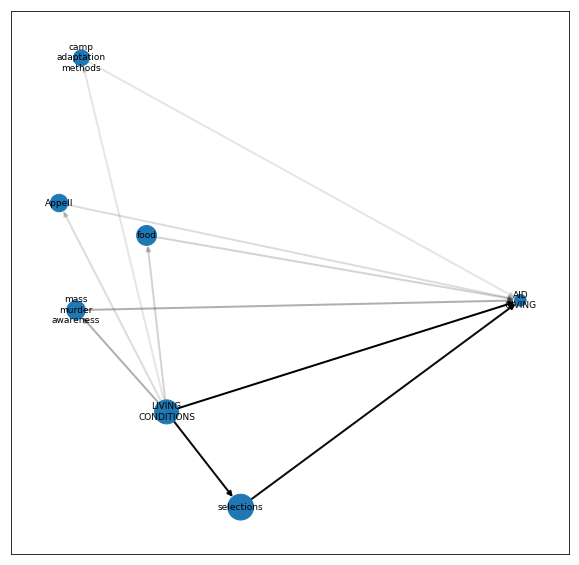

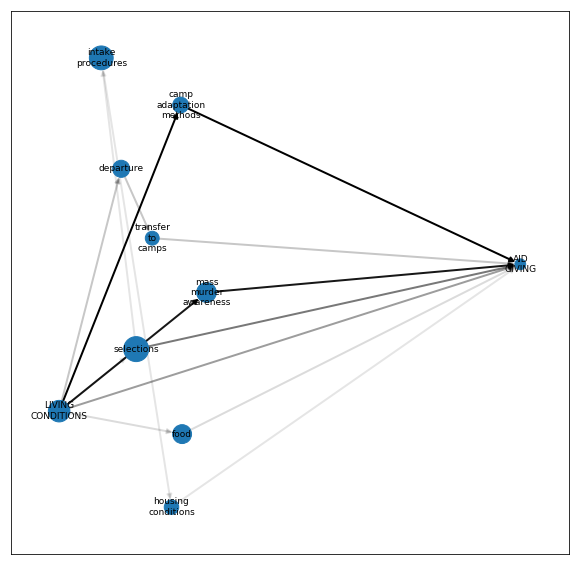

In [656]:
story_start = ['living conditions']
story_end = ['aid giving']
flux = 0.25
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 15

### Qualitative description

In narratives of those men and women who did not work, aid giving and survival explanations are much more connected for women:

aid giving-survival explanations


For women 1.8% of total traffic is going through this path, whereas for men, it is 0.7753%.

### Quantitative evidence

In [659]:
flux = 0.8
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [660]:
print_similar_paths(flux_w,flux_m)

aid giving-survival explanations
Women: 1.8997682440541095
Men: 0.7753690554284672


aid giving-selections-survival explanations
Women: 4.902150158539
Men: 4.17033952161439


aid giving-children-survival explanations
Women: 0.5082401796012548
Men: 0.7362002196727215




### Visualize it

8 labels to show
10 labels to show


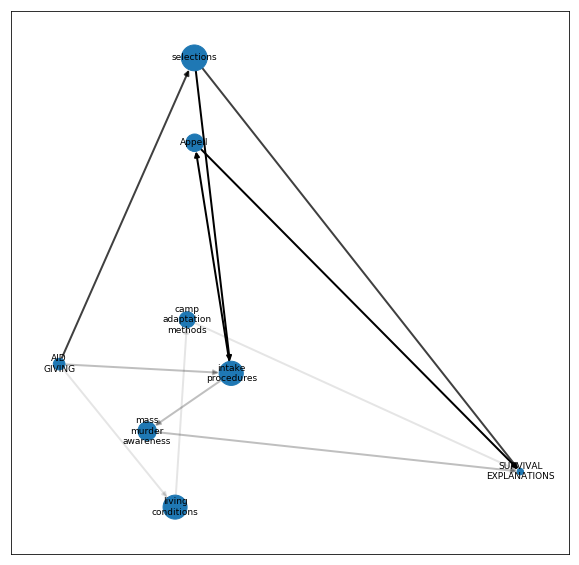

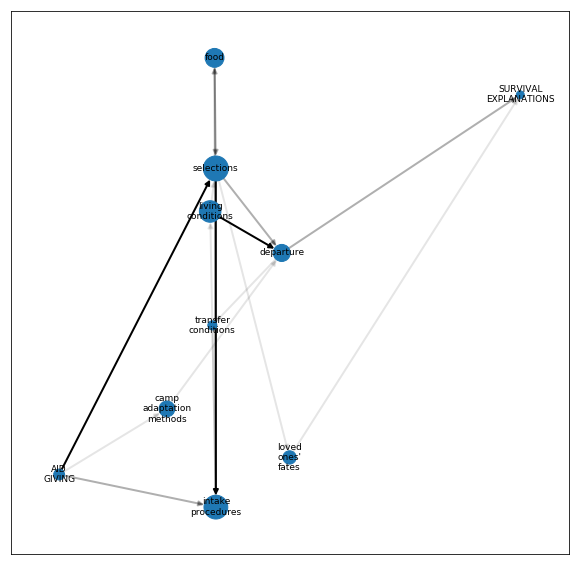

In [662]:
story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.15
res = visualize_most_important_paths(data_set_1_w_not_w,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_not_w,flux,features_df,story_start,story_end,None)

## Observation 16

### Qualitative description

In narratives of those men and women who worked, aid giving and survival explanations are  more connected for men:

aid giving-survival explanations


For women 2.6% of total traffic is going through this path, whereas for men, it is 3.39%.

But in case of women, there are a number of short non-directs paths:

aid giving-social relations-survival explanations:1.5957266441234774

aid giving-diseases-survival explanations: 1.2137559365334227

aid giving-friends-survival explanations:0.8478423026431587

aid giving-food-survival explanations:2.105173850686586




### Quantitative evidence

In [667]:
flux = 1
story_start = 'aid giving'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [671]:
print_paths(flux_w,max_length=3)

aid giving-forced labor-survival explanations:10.274883518436624


aid giving-selections-survival explanations:6.262382909056715


aid giving-survival explanations:2.629599814325141


aid giving-food-survival explanations:2.105173850686586


aid giving-camp adaptation methods-survival explanations:1.9000349846387947


aid giving-social relations-survival explanations:1.5957266441234774


aid giving-family interactions-survival explanations:1.3481277578061988


aid giving-brutal treatment-survival explanations:1.305002396267506


aid giving-sanitary conditions-survival explanations:1.2298922862940629


aid giving-diseases-survival explanations:1.2137559365334227


aid giving-mass murder awareness-survival explanations:1.1929167068256783


aid giving-friends-survival explanations:0.8478423026431587


aid giving-preferential treatment-survival explanations:0.581804348864271


aid giving-transfer from camps-survival explanations:0.2463966768002423




In [675]:
print_paths(flux_m,max_length=3)

aid giving-forced labor-survival explanations:5.301981681895436


aid giving-selections-survival explanations:4.708154304765713


aid giving-survival explanations:3.397730426091518


aid giving-intake procedures-survival explanations:2.1722231257740403


aid giving-hiding and evasion-survival explanations:1.3473658077421045


aid giving-deportation procedures-survival explanations:0.6288348455607363


aid giving-emotions-survival explanations:0.2161231573236961


aid giving-resistance groups-survival explanations:0.1501670470890705




In [674]:
print_similar_paths(flux_w,flux_m)

aid giving-forced labor-survival explanations
Women: 10.274883518436624
Men: 5.301981681895436


aid giving-survival explanations
Women: 2.629599814325141
Men: 3.397730426091518


aid giving-selections-survival explanations
Women: 6.262382909056715
Men: 4.708154304765713




### Visualize

11 labels to show
18 labels to show


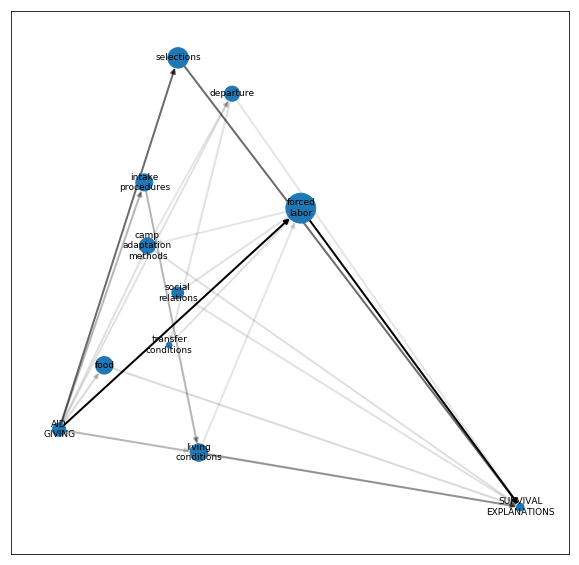

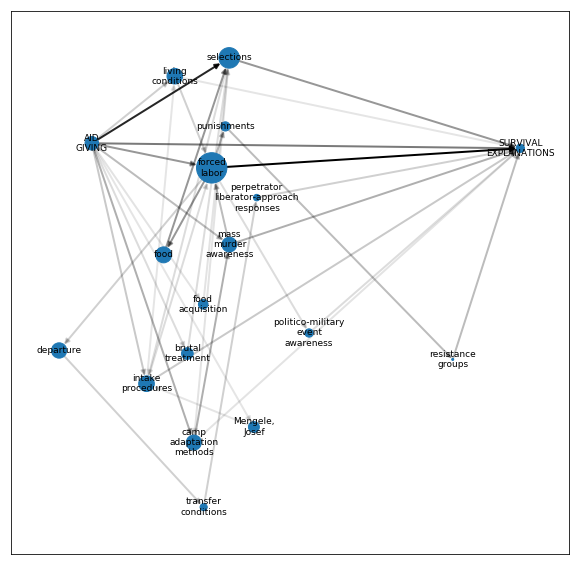

In [678]:

story_start = ['aid giving']
story_end = ['survival explanations']
flux = 0.3
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 17

### Qualitative descriptions

In narratives of those men and women who worked, social relations and survival explanations are  more connected for women:

social relations-survival explanations


For women 4.7% of total traffic is going through the path above;  for men 2.5% is going through this path.

A key path with transitory topic for men includes:

social relations-aid giving-survival explanations
2.50368892717799

Key paths with transitory topics for women includes:

social relations-living conditions-survival explanations:2.9110184744683765

social relations-preferential treatment-survival explanations:0.8644349360585929


social relations-friends-survival explanations:0.7264439886153188


### Quantitative evidence

In [690]:
flux = 1
story_start = 'social relations'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [692]:
print_paths(flux_w,max_length=3)

social relations-forced labor-survival explanations:6.580571008586384


social relations-selections-survival explanations:6.204915845414966


social relations-survival explanations:4.770496146893108


social relations-living conditions-survival explanations:2.9110184744683765


social relations-family interactions-survival explanations:1.3385004112989138


social relations-mass murder awareness-survival explanations:1.1826991688454527


social relations-preferential treatment-survival explanations:0.8644349360585929


social relations-friends-survival explanations:0.7264439886153188


social relations-bombardments-survival explanations:0.6957857767932119


social relations-prisoner medical personnel-survival explanations:0.010500443274819094


social relations-language skills-survival explanations:3.867675020664205e-06




In [693]:
print_paths(flux_m,max_length=3)

social relations-forced labor-survival explanations:5.359631090912522


social relations-selections-survival explanations:2.786869785455474


social relations-mass murder awareness-survival explanations:2.6301303605978252


social relations-aid giving-survival explanations:2.50368892717799


social relations-survival explanations:0.20601493217494038




In [686]:
print_similar_paths(flux_w,flux_m)

social relations-survival explanations
Women: 4.770496146893108
Men: 0.20601493217494038


social relations-forced labor-survival explanations
Women: 6.580571008586384
Men: 5.359631090912522


social relations-selections-survival explanations
Women: 6.204915845414966
Men: 2.786869785455474


social relations-mass murder awareness-survival explanations
Women: 1.1826991688454527
Men: 2.6301303605978252




### Visualize

5 labels to show
10 labels to show


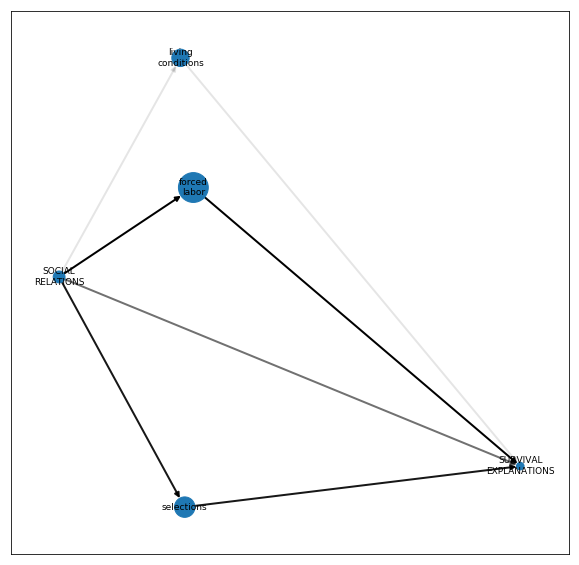

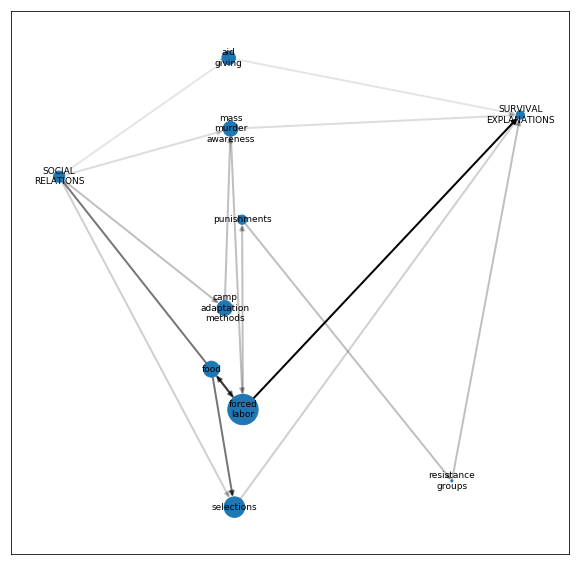

In [704]:

story_start = ['social relations']
story_end = ['survival explanations']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18

### Qualitative description

In narratives of those men and women who worked, social relations and forced labor are more connected for men:

social relations-forced labor
Women: 7.786906600083256
Men: 11.051234286602039

forced labor-social relations
Women: 10.931980703238628
Men: 11.027089792748091



### Quantitative evidence

In [706]:
flux = 1
story_start = 'social relations'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)



In [707]:
print_similar_paths(flux_w,flux_m,max_length=2)

social relations-forced labor
Women: 7.786906600083256
Men: 11.051234286602039




In [708]:
flux = 1
story_start = 'forced labor'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [710]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-social relations
Women: 10.931980703238628
Men: 11.027089792748091




### Visualize 

6 labels to show
5 labels to show


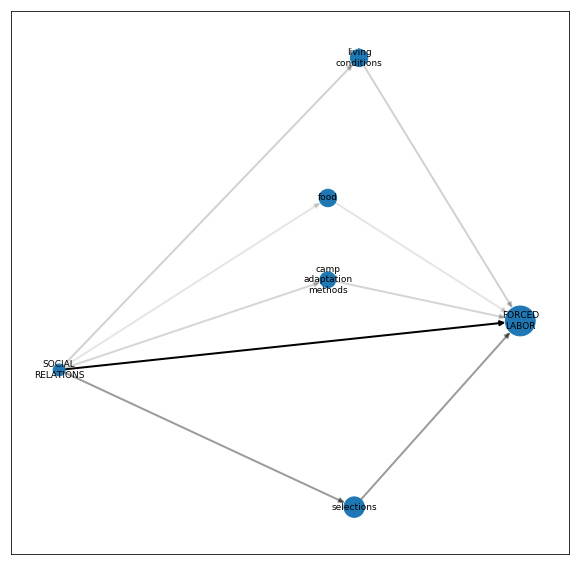

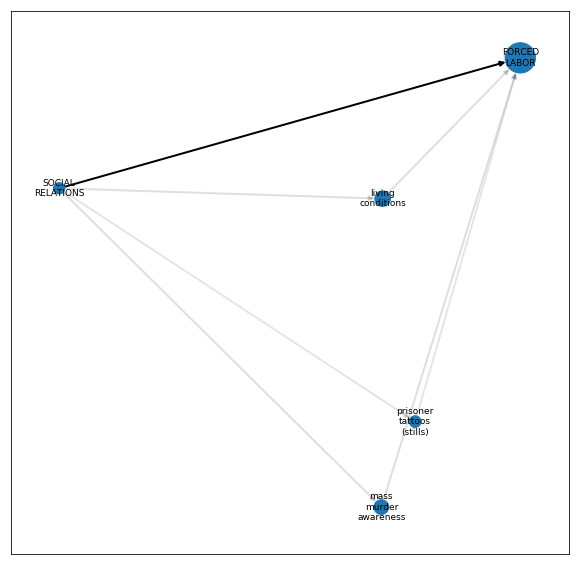

In [721]:

story_start = ['social relations']
story_end = ['forced labor']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 18 B

### Qualitative description

In narratives of those men and women who worked, social relations and living conditions are  more or less equally connected  for women and men:

social relations-living conditions


For women 5.1% of total traffic is going through the path above;  for men 5.57% is going through this path:

social relations-living conditions

For women 4.3% of total traffic is going through the path above;  for men 4.5% is going through this path:

### Quantitative evidence

In [711]:
flux = 0.4
story_start = 'living conditions'
story_end = 'social relations'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [712]:
print_similar_paths(flux_w,flux_m,max_length=2)

living conditions-social relations
Women: 5.141839712507309
Men: 5.575031388390401




In [713]:
flux = 0.4
story_start = 'social relations'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [714]:
print_similar_paths(flux_w,flux_m,max_length=2)

social relations-living conditions
Women: 4.38237424390237
Men: 4.5634928495579485




### Visualize

6 labels to show
5 labels to show


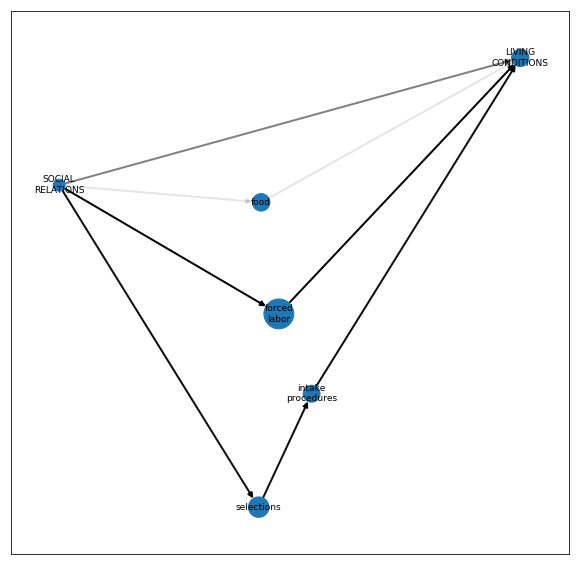

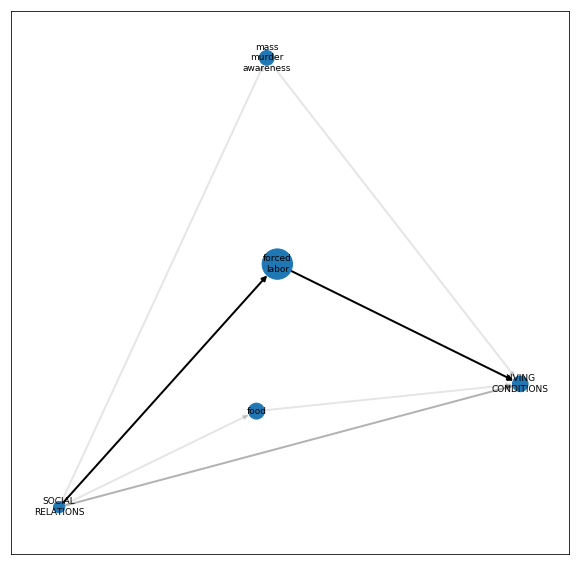

In [761]:

story_start = ['social relations']
story_end = ['living conditions']
flux = 0.18
res = visualize_most_important_paths(data_set_1_w_work,flux,features_df,story_start,story_end,None)
res=visualize_most_important_paths(data_set_1_m_work,flux,features_df,story_start,story_end,None)

## Observation 19

### Qualitative description

Forced labor and aid giving are strongly and more or less equally connected for those women and men who worked. Generally, we see a strong connection between forced labor and aid giving.

### Quantitative evidence

In [720]:
flux = 1
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [721]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 15.965854319863244
Men: 16.984021815412085




In [722]:
flux = 1
story_start = 'aid giving'
story_end = 'forced labor'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [723]:
print_similar_paths(flux_w,flux_m,max_length=2)

aid giving-forced labor
Women: 12.739606293717992
Men: 11.503468180683653




## Observation 20

### Qualitative description

Living conditions and food sharing are more connected for those women who worked than those men who worked. For instance, for women 6.6% is going through the following paths:

living conditions-food-food sharing

and 3.5% through the following one:

living conditions-food sharing

In testimonies of men, direct path was not found, instead the traffic is going through the following two paths:

living conditions-social relations-food sharing
2 %

living conditions-aid giving-food sharing
1.3 %


### Quantitative evidence

In [730]:
flux = 1
story_start = 'living conditions'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [738]:
print_paths(flux_w,max_length=3)

living conditions-forced labor-food sharing:13.33343293337342


living conditions-food-food sharing:6.694203253395258


living conditions-selections-food sharing:3.6251280142840314


living conditions-food sharing:3.531295335718942


living conditions-camp adaptation methods-food sharing:2.5406916810831404


living conditions-Appell-food sharing:2.1199443423068263


living conditions-mass murder awareness-food sharing:1.7299635517089926


living conditions-social relations-food sharing:1.675554976037297


living conditions-brutal treatment-food sharing:1.2112142797693668


living conditions-extended family members-food sharing:1.0379543162096334


living conditions-stealing-food sharing:0.9728015212314255


living conditions-camp procedures-food sharing:0.8042263266058218


living conditions-survival explanations-food sharing:0.7868149102356049


living conditions-camp childbearing-food sharing:0.7245532844805611


living conditions-cultural activities-food sharing:0.5246266336695484



In [737]:
print_paths(flux_m,max_length=3)

living conditions-forced labor-food sharing:17.726226721172548


living conditions-camp adaptation methods-food sharing:2.559928814611807


living conditions-social relations-food sharing:2.051116314998833


living conditions-crematoria-food sharing:1.732175428342294


living conditions-kapos-food sharing:1.4670588607449961


living conditions-aid giving-food sharing:1.3705756448106658


living conditions-prisoner external contact-food sharing:1.2117405106745853


living conditions-children-food sharing:0.6428772105608592


living conditions-loved ones' renewed contacts-food sharing:0.435753919922684


living conditions-departure-food sharing:0.2820238572843283


living conditions-diseases-food sharing:0.0013947090499061134




In [734]:
print_similar_paths(flux_w,flux_m,max_length=4)

living conditions-social relations-food sharing
Women: 1.675554976037297
Men: 2.051116314998833


living conditions-camp adaptation methods-food sharing
Women: 2.5406916810831404
Men: 2.559928814611807


living conditions-forced labor-food sharing
Women: 13.33343293337342
Men: 17.726226721172548




## Observation 21

In [742]:
### Qualitative description

Forced labor and food sharing are more connected for men who worked than those women who worked. For instance, for women 13.3% is going through the following paths:

forced labor-food sharing

for men it is 22%

In case of aid giving the difference is slighter:

forced labor-aid giving

for women it is 15.965854319863244

and for men it 16.98


In [743]:
### Quantitative evidence

In [745]:
flux = 0.3
story_start = 'forced labor'
story_end = 'food sharing'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [746]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-food sharing
Women: 13.933977446499657
Men: 22.409844706135193




In [747]:
flux = 0.3
story_start = 'forced labor'
story_end = 'aid giving'
flux_w = calculate_flux(data_set_1_w_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_work,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)


In [748]:
print_similar_paths(flux_w,flux_m,max_length=2)

forced labor-aid giving
Women: 15.965854319863244
Men: 16.984021815412085




## Observation 22

### Qualitative description

Those men who did not work are more likely to connect stealing and camp living conditions.

### Quantitative evidence

In [768]:
flux = 0.2
story_start = 'living conditions'
story_end = 'stealing'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [769]:
print_similar_paths(flux_w,flux_m)

living conditions-stealing
Women: 4.335615442875648
Men: 30.402370724407824




In [770]:
flux = 0.2
story_start = 'stealing'
story_end = 'living conditions'
flux_w = calculate_flux(data_set_1_w_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m_not_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [771]:
print_similar_paths(flux_w,flux_m)

stealing-selections-intake procedures-living conditions
Women: 10.116749298333374
Men: 4.30596958539694


stealing-living conditions
Women: 6.570988819126371
Men: 8.813948358670133




## Observation 23

### Qualitative description

In narratives of women, preferential treatment is more likely to lead to survival explanation.

### Quantitative evidence

In [781]:
flux = 1
story_start = 'preferential treatment'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [786]:
print_paths(flux_w,max_length=2)

preferential treatment-survival explanations:2.236054659629023




In [787]:
print_paths(flux_m,max_length=2)

preferential treatment-survival explanations:0.7167492514937736




## Observation 24

### Qualitative description

In narratives of women, Blockalteste is more connected to survival explanations;

Blockälteste-survival explanations
Women: 1.5644480047580056
Men: 0.8118622824526782

### Quantitative evidence

In [803]:
flux = 1
story_start = 'Blockälteste'
story_end = 'survival explanations'
flux_w = calculate_flux(data_set_1_w,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
print ('\n')
flux_m = calculate_flux(data_set_1_m,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

In [801]:
print_paths(flux_w,max_length=3)

Blockälteste-camp adaptation methods-preferential treatment:2.881380183194115


Blockälteste-preferential treatment:2.632977130158173




In [802]:
print_paths(flux_m,max_length=3)

Blockälteste-preferential treatment:3.6940407642848045




In [799]:
print_similar_paths(flux_w,flux_m)

Blockälteste-aid giving
Women: 3.2876727182430323
Men: 3.3891305884442704


Blockälteste-forced labor-aid giving
Women: 5.221763040547453
Men: 4.152045397292433


Blockälteste-social relations-aid giving
Women: 1.5959311325137826
Men: 2.7339779516723937


Blockälteste-beatings-aid giving
Women: 0.7419141225808749
Men: 0.953814629308622




## Observation 25

In [67]:
from tqdm.notebook import trange, tqdm
def identify_paths_with_substantial_difference(states,model_1,model_2,ratio=1.5):
    
    flux = 0.6
    
    for i in trange(len(states)):
        story_start = states[i]
        for target in states:
            try:
                if target == story_start:
                    continue
                else:
                    story_end = target
                    flux_1 = calculate_flux(model_1,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)

                    flux_2 = calculate_flux(model_2,features_df.KeywordLabel.to_list(),[story_start],[story_end],fraction=flux)
                    result=print_similar_paths(flux_1,flux_2,max_length=3,show=False)
                    for element in result:
                        if ((element[1]/element[2])>ratio) or ((element[2]/element[1])>ratio):
                            print (element[0])
                            print (element[1])
                            print (element[2])
            except:
                pass

In [50]:
main_nodes = stationary_probs[0:70].topic_name.to_list()

In [63]:
identify_paths_with_substantial_difference(main_nodes,data_set_1_w,data_set_1_m,ratio=2)

intake procedures-loved ones' separations
4.010953054580285
8.1464296583337
living conditions-camp childbearing
7.343674977727918
37.739071184585846
food-menstruation
8.23360894410689
100.0
camp adaptation methods-transfer procedures
4.490803798279732
9.624248465363713
departure-loved ones' fates
2.1523424960085635
4.454086076779484
departure-loved ones' renewed contacts
2.978469313870751
7.2715839562420745
departure-food sharing
1.487619334225511
3.2108503146318306
departure-medical care
2.453513311808806
5.69812062768739
transfer to camps-living conditions
4.205731200338133
1.402777701155727
transfer to camps-loved ones' fates
2.4142643149422742
5.7936442073702565
diseases-food
4.206386786599543
9.75804487583009
crematoria-forced labor
4.773246351821203
11.171824051083417
hiding and evasion-forced labor
4.477338671606936
9.43750088038722
friends-forced labor
7.431426222661657
2.6768092638626446
prisoner external contact-selections
13.034123410829588
5.093233496879988



In [ ]:
identify_paths_with_substantial_difference(main_nodes,data_set_1_w_not_w,data_set_1_m_not_w,ratio=3)

selections-Mengele, Josef-camp adaptation methods
1.9840629871314621
0.4819841832269449
selections-transfer procedures-departure
2.0582499356221713
0.535616266429359
selections-transfer procedures-transfer to camps
2.4132083080585307
0.5142079287381577
selections-camp adaptation methods-transfer to camps
3.126934165900012
0.7243442010640614
selections-loved ones' final contacts-prisoner tattoos
0.5897210411648851
1.8291257736780402
selections-intake procedures-psychological reactions
8.83035522457516
2.8075258341082336
selections-loved ones' separations-camp barracks
1.1104477715973358
3.535962188061764
selections-camp adaptation methods-camp barracks
0.8714855465603886
2.993615208056635
selections-loved ones' separations-arrival
4.251348571434256
1.1481383388532818
selections-intake procedures-prisoner physical conditions
2.5692825230812883
0.835974694454357
selections-loved ones' fates-Jewish prisoners
0.622317581922587
2.7356129537566436
selections-transfer procedures-transfers, mea

living conditions-food-kapos
1.4600092069614234
6.783688366282042
living conditions-female prisoners
7.360952157408869
2.286633486357829
living conditions-food-female prisoners
6.043523344317771
2.0103180504403104
living conditions-food-hiding and evasion
3.4730274375934065
0.7974890675993999
living conditions-food-sustenance provision
6.012228353278867
0.9864736660244694
living conditions-transfer to camps-sustenance provision
0.6287009428073818
2.9178599950698016
living conditions-food-friends
0.9735213795303795
3.3977413404422845
living conditions-prisoner external contact
13.870597571043634
1.624648369664078
living conditions-camp adaptation methods-hospitals
0.9126402262445762
5.195280545458585
living conditions-medical care
1.3007563477545316
8.090851256168657
living conditions-brutal treatment-medical care
0.5376058416960496
1.8276476645015445
living conditions-camp adaptation methods-shoes
1.1168580255807228
4.42204021594459
living conditions-departure-humiliation
0.71706970749

departure-medical care
2.691975573657697
23.23550516904099
departure-environmental conditions
0.6620160941476539
3.560313601759798
departure-survival explanations-environmental conditions
0.6720288746659421
2.0618868721541297
departure-loved ones' fates-shoes
0.6530931315179197
2.28907577241618
departure-humiliation
0.8442531354285758
5.000474552990315
departure-transfer to camps-sisters
0.8750508935068974
8.844430370253026
departure-sisters
0.7294143172724621
6.949007585726605
Appell-prisoner tattoos (stills)-selections
0.7853547440347075
2.4116510353781258
Appell-loved ones' final contacts-intake procedures
0.3548945499378715
1.2246383531173377
Appell-prisoner tattoos (stills)-intake procedures
0.3479456220501017
1.4737238105877095
Appell-intake procedures
0.983879962088798
3.5542647115755113
Appell-intake procedures-living conditions
0.651213726413046
2.7287106555729137
Appell-prisoner tattoos (stills)-living conditions
0.9363390471244764
3.9921589699081172
Appell-prisoner tattoos (

extended family members-latrines
1.4104057522505205
5.802210945591896
prisoner tattoos-extended family members-intake procedures
0.4225873872736563
2.662725232220695
prisoner tattoos-prisoner tattoos (stills)-intake procedures
0.3921652744481549
1.6394552186641398
prisoner tattoos-camp barracks-living conditions
0.6985584587655254
2.4843525790363516
prisoner tattoos-social relations
1.2071635490049009
6.480932976931167
prisoner tattoos-Blockälteste
1.963139088164223
6.254859749602264
prisoner tattoos-psychological reactions
0.8515169460876318
5.899951402291562
prisoner tattoos-mass murder awareness-prisoner external contact
7.415189761130287
2.213234773284601
SS/SD personnel-aid giving-selections
2.456210539294484
0.8072533279590853
SS/SD personnel-mass murder awareness-camp adaptation methods
0.9017260634581461
4.548633060369842
SS/SD personnel-clothing
2.1684724094236105
6.850365974803635
SS/SD personnel-corpses
1.4363861817682513
5.01332560715412
SS/SD personnel-showers
1.4024896847

freight trains-living conditions
1.1049917109128702
5.064512406278596
freight trains-extended family members
5.347203576924749
1.6847111388274436
survival explanations-food-selections
1.2219498328446434
4.202296031365615
survival explanations-food-living conditions
1.218603794360255
3.914430171432837
survival explanations-prisoner tattoos-living conditions
0.6528478533004055
3.129306609813876
survival explanations-food
1.352987221946132
9.150332678492347
survival explanations-family interactions
1.0304655960192233
3.2453711153755047
survival explanations-prisoner tattoos
1.035468319469548
8.545271205976423


The main context of solidarity for women was the barack, i.e. the everyday living environment. By contrast, for men solidarity was rather connected with forced labour and the working environment. Therefore, women and men remember about acts of solidarity in different contexts, which also suggests that they took place in different contexts in the past.

We can see a similar pattern with social activity. Women discuss it in the context of the living environment, whereas man discuss it in the context of work environment.

Generally, speaking if we look at the amount of traffic going through social activity and solidarity, we can see that in case of  women more traffic is going towards solidarity and social activity. 

What also illustrates the different role of solidarity and sociability for men and women is that women are likely to attribute their survival to them

In the dataset we can observe two general trends about the way women and men discuss acts of solidarity and social bonds.
First, both men and women discuss aid giving in the context of camp living conditions and forced labour; however, men are more likely to talk about these topics following forced labour activity, whereas women rather discuss them in context of living conditions in the camp. (This is supported by Observation 1, Observation 2). 
The same can be observed with food sharing. Women rather discuss food sharing in the context of living conditions, and men tend to discuss it in the context of forced labour. (Supported by Observation 4). 
Similarly, women tend to discuss friendship following living conditions rather than men do. However, friendship and forced labour are equally connected for women and men. (Supported by Observation 5 and 6).
At the same time, women tend to connect social relations with the living environment whereas men rather connect it with forced labour (supported by Observation 5A).
The trend that women are more likely to connect the living environment with social activity and solidarity than men is becoming stronger when we compare those men and women who did not work (supported by Observation 14, 14 A. And 14 B).
At the same time, women and men who worked are equally likely to connect the living environment with social relations (supported by Observation 18 B) but social relations remain more connected with forced labour for men. 
Similarly, men who worked are more likely to discuss food sharing in the context of forced labor than women; in case of aid giving the difference is slighter but men still tend to connect forced labour with aid giving more (supported by Observation 21).
All this suggests that in women's barracks more social life and acts of solidarity took place thank in men barracks; by contrast men were more likely to experience solidarity and social bonds during forced labour.  This is also supported by that men who did not work are much more likely to connect the living environment with stealing.

Second, both women and men discuss solidarity and social bonds in the context of survival explanations. However, women are more likely to connect solidarity and social bonds with survivor explanations. (Supported by Observation 8). Women are particularly more likely to attribute their survival of selections to social relations, friends and aid giving (supported by Observation 9). Particularly women who did not work are more likely to connect friendship and aid giving with survival explanations (supported by Observation 13,15).